# Julia juypter notebook for TITLE (http://...)

## Ran using Julia 1.6.2

# Basic dynamics plot (determinisitc)

In [1]:
using DifferentialEquations
using Plots; pyplot()

Plots.PyPlotBackend()

In [2]:
#define model with delay
function dde_system(du,u,h,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
    histC_MDSC = h(p, t-τ₁; idxs=1)
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*histC_MDSC/(γ₁+(histC_MDSC^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

dde_system (generic function with 1 method)

In [3]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T 
end

ode_system (generic function with 1 method)

In [4]:
#define initial number of tumor cells for delay model
h2(p, t; idxs=nothing) = typeof(idxs) <: Number ? 1.0 : ones(4)
h2(1,0)

4-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0

In [5]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [6]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

## Panel a

In [7]:
#solve with τ₁ = 0
prob_panel_a = ODEProblem(ode_system,u0,tspan,p)
sol_panel_a = solve(prob_panel_a,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 445-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658731855330636
   0.6178678412300449
   1.08210261861819
   1.684126310943165
   2.4317786018601573
   3.34578128252542
   4.446307229515896
   5.765151525342025
   7.3470861647998404
   9.261456882988949
  11.618070929491504
   ⋮
 187.9672031342375
 190.03999794557305
 192.9080599208194
 196.63918381898029
 201.59464423824605
 208.01413758737382
 216.52337407060975
 227.97513152798126
 244.3682518224029
 270.40390772927594
 323.1263863026601
 365.0
u: 445-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0499376846703614, 500.0006138318529, 228758.1697666647, 0.0015506139550194307]
 [1.2371655191044955, 500.00288952088306, 228758.16653464, 0.00739247487097743]
 [1.625829025487545, 500.0075401967587, 228758.15023991073, 0.01967656172997377]
 [2.2977508055193923, 500.01551776993205, 228758.10325701066, 0.041424678823349784

## Panel b

In [8]:
#solve with τ₁ = 10
τ₁ = 10.0
lags = [τ₁]
prob_panel_b = DDEProblem(dde_system,u0,h2,tspan,p;constant_lags=lags)
sol_panel_b = solve(prob_panel_b,alg)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2026-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658734178686916
   0.6178687107454937
   1.0821047745271066
   1.6841306003991123
   2.4317868938108327
   3.3457984635632845
   4.446346083730195
   5.765250476321567
   7.347365035501882
   9.262303706455713
  10.0
   ⋮
 364.2512925952412
 364.3231782533725
 364.39506390388647
 364.466949551544
 364.5388351963451
 364.61072083828964
 364.6826064773777
 364.75449211837014
 364.8263777565061
 364.89826340130713
 364.9701490432517
 365.0
u: 2026-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.049937684670211, 500.00059895308914, 228758.1697693897, 0.0015506139550585689]
 [1.2371657460757373, 500.0025892819727, 228758.1667743292, 0.0073924819999076925]
 [1.625830100813976, 500.00581217656213, 228758.15337768738, 0.019676596661356113]
 [2.2977543746170803, 500.00973019024576, 228758.12112892728, 0.04142480372273145]
 [3

## Panel c

In [9]:
#solve with τ₁ = 50
τ₁ = 50.0
lags = [τ₁]
prob_panel_c = DDEProblem(dde_system,u0,h2,tspan,p;constant_lags=lags)
sol_panel_c = solve(prob_panel_c,alg)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 61-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658734178686916
   0.6178687107454937
   1.0821047745271066
   1.6841306003991123
   2.4317868938108327
   3.3457984635632845
   4.446346083730195
   5.765250476321567
   7.347365035501882
   9.262303706455713
  11.620621114648774
   ⋮
 298.81872958596455
 300.0
 305.8328940253516
 310.9484744236442
 317.6921821292129
 324.2785929641402
 331.4271970890849
 338.4450005015858
 345.5349241874984
 352.4408109871918
 359.0814132898404
 365.0
u: 61-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.049937684670211, 500.00059895308914, 228758.1697693897, 0.0015506139550585689]
 [1.2371657460757373, 500.0025892819727, 228758.1667743292, 0.0073924819999076925]
 [1.625830100813976, 500.00581217656213, 228758.15337768738, 0.019676596661356113]
 [2.2977543746170803, 500.00973019024576, 228758.12112892728, 0.04142480372273145]
 [3.515

## Panel d

In [10]:
#solve with τ₁ = 365
τ₁ = 365.0
lags = [τ₁]
prob_panel_d = DDEProblem(dde_system,u0,h2,tspan,p;constant_lags=lags)
sol_panel_d = solve(prob_panel_d,alg)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 35-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658734178686916
   0.6178687107454937
   1.0821047745271066
   1.6841306003991123
   2.4317868938108327
   3.3457984635632845
   4.446346083730195
   5.765250476321567
   7.347365035501882
   9.262303706455713
  11.620621114648774
   ⋮
 112.08121128158379
 133.41601612639033
 159.42186225156118
 191.64642067117916
 234.4977658739547
 269.2358080692991
 285.8424753492777
 301.1547005123996
 317.0853514642827
 333.9599065613273
 351.6206096167115
 365.0
u: 35-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.049937684670211, 500.00059895308914, 228758.1697693897, 0.0015506139550585689]
 [1.2371657460757373, 500.0025892819727, 228758.1667743292, 0.0073924819999076925]
 [1.625830100813976, 500.00581217656213, 228758.15337768738, 0.019676596661356113]
 [2.2977543746170803, 500.00973019024576, 228758.12112892728, 0.04142480372

## Plot

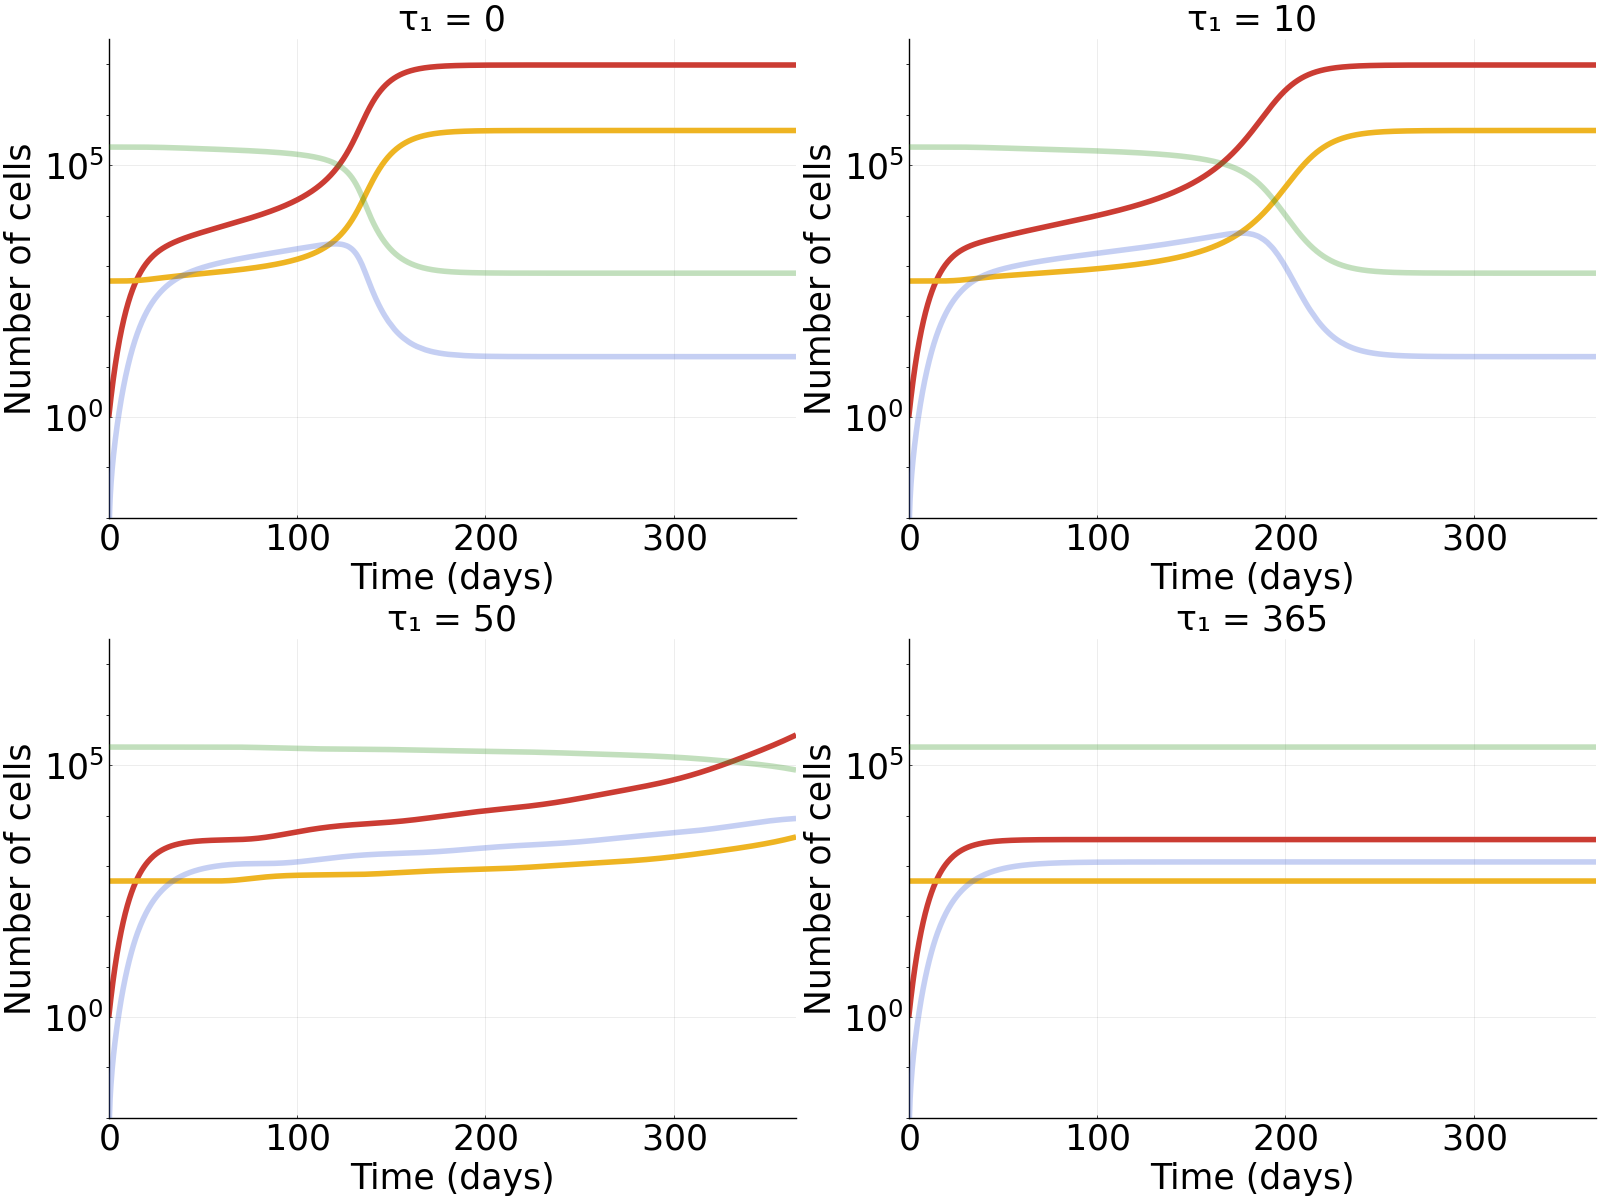

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


In [11]:
#plot results
l = @layout [a b; c d]
logocolors = Colors.JULIA_LOGO_COLORS
a = plot(sol_panel_a, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
b = plot(sol_panel_b, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)
c = plot(sol_panel_c, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)
d = plot(sol_panel_d, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)
plot(a, b, c, d, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

## G calculations

In [1]:
using DifferentialEquations
using Plots; pyplot()

Plots.PyPlotBackend()

In [2]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

ode_system (generic function with 1 method)

In [3]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

## Panel a

In [4]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [5]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

0.8111559703245904

In [6]:
#solve with α₁₁ = 0
prob_panel_a = ODEProblem(ode_system,u0,tspan,p)
sol_panel_a = solve(prob_panel_a,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 445-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658731855330636
   0.6178678412300449
   1.08210261861819
   1.684126310943165
   2.4317786018601573
   3.34578128252542
   4.446307229515896
   5.765151525342025
   7.3470861647998404
   9.261456882988949
  11.618070929491504
   ⋮
 187.9672031342375
 190.03999794557305
 192.9080599208194
 196.63918381898029
 201.59464423824605
 208.01413758737382
 216.52337407060975
 227.97513152798126
 244.3682518224029
 270.40390772927594
 323.1263863026601
 365.0
u: 445-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0499376846703614, 500.0006138318529, 228758.1697666647, 0.0015506139550194307]
 [1.2371655191044955, 500.00288952088306, 228758.16653464, 0.00739247487097743]
 [1.625829025487545, 500.0075401967587, 228758.15023991073, 0.01967656172997377]
 [2.2977508055193923, 500.01551776993205, 228758.10325701066, 0.041424678823349784

## Panel b

In [7]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.81 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [8]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

0.0011559703245903608

In [9]:
#solve with α₁₁ = 0.81
prob_panel_b = ODEProblem(ode_system,u0,tspan,p)
sol_panel_b = solve(prob_panel_b,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 27-element Vector{Float64}:
   0.0
   0.06026319071061688
   0.6628950978167857
   2.6285563507918503
   5.9785643229107155
  10.373675099044792
  16.109939551683464
  23.215565882237463
  31.90797313693023
  42.32397405057573
  54.75053510371529
  69.53931614400449
  87.26506215695187
   ⋮
 169.37694402698244
 207.9560365954279
 224.99819092286128
 240.47382121311344
 256.3865307300418
 273.1677958174278
 290.7235835507921
 308.6951866908537
 326.70314494188835
 344.52985076279094
 362.1413674356732
 365.0
u: 27-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0000694553955596, 500.0005990356662, 228758.1697693517, 0.001513285657960967]
 [1.000741729712397, 500.0062106922454, 228758.15094540018, 0.016305754896854163]
 [1.0026763266292371, 500.02047415842446, 228757.91672691298, 0.060501600607488285]
 [1.0052223250076056, 500.0349925073917, 228757.16607628966, 0.12330240840409104]
 [1.0

## Panel c

In [10]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 1.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [11]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

-0.18884402967540959

In [12]:
#solve with α₁₁ = 1.0
prob_panel_c = ODEProblem(ode_system,u0,tspan,p)
sol_panel_c = solve(prob_panel_c,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 32-element Vector{Float64}:
   0.0
   0.06026285200529721
   0.3944160223209874
   1.078806968028187
   2.0557432958986555
   3.337174330481057
   5.001938595430361
   7.095683273187781
   9.703612466765511
  12.904649021266206
  16.800268473726167
  21.502002041122203
  27.13381760282179
   ⋮
 137.88449346412898
 167.86024977581516
 206.66432488902862
 239.00781590327495
 256.236104148281
 271.9554932962574
 287.7578627320467
 304.2223382184734
 321.46307402630424
 339.2576101320652
 357.24988365522677
 365.0
u: 32-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [0.9887180655940915, 500.0005956158799, 228758.1697699825, 0.001504657762530663]
 [0.9295698153294281, 500.00365479194215, 228758.1632240973, 0.009436322127571218]
 [0.8243815042201627, 500.00877832044097, 228758.12453758088, 0.02370693382645528]
 [0.704046843869449, 500.0139620361686, 228758.02670666427, 0.04022150305314154]
 [0

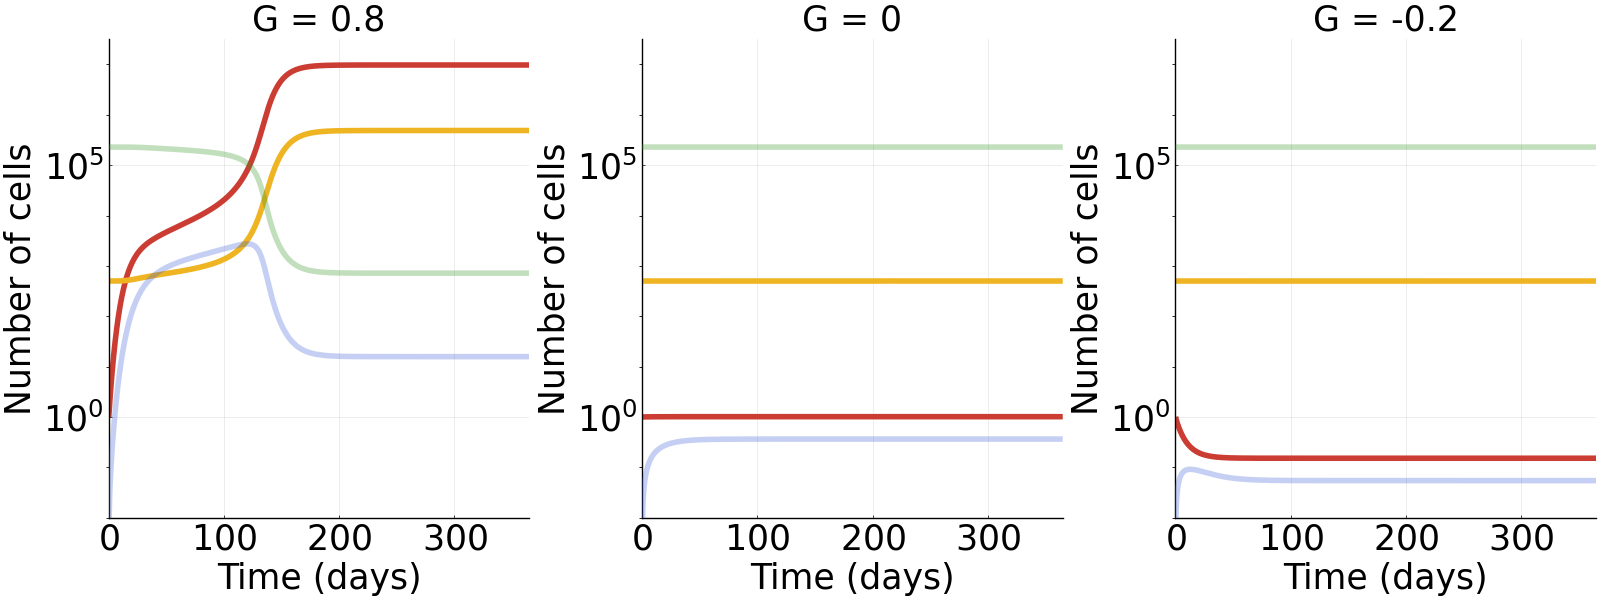

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


In [13]:
#plot results
l = @layout [a b c]
logocolors = Colors.JULIA_LOGO_COLORS
a = plot(sol_panel_a, lw = 4, yaxis=:log,size =(1600/3,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "G = 0.8",titlefontsize=25)
b = plot(sol_panel_b, lw = 4, yaxis=:log,size =(1600/3,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "G = 0",titlefontsize=25)
c = plot(sol_panel_c, lw = 4, yaxis=:log,size =(1600/3,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "G = -0.2",titlefontsize=25)
plot(a, b, c, layout = l,size =(1600,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

# α₁₄ calculations

In [1]:
using DifferentialEquations
using Plots; pyplot()

Plots.PyPlotBackend()

In [2]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK #- β₁*NK*C 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T #- β₂*T*C
end

ode_system (generic function with 1 method)

In [3]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

## Panel e

In [4]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = (10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 303030.303030303
      0.0

In [5]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

0.5512035044897718

In [6]:
#solve with α₁₄ = 10⁻⁵
prob_panel_e = ODEProblem(ode_system,u0,tspan,p)
sol_panel_e = solve(prob_panel_e,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 34-element Vector{Float64}:
   0.0
   0.051937098115968826
   0.30114101634968166
   0.7941046672564865
   1.4933753240851284
   2.404452231851278
   3.5813180079056517
   5.069989759581608
   6.958171568649835
   9.376803851708914
  12.554206696876376
  17.074689464150353
  22.21975441947014
   ⋮
 160.5998736111142
 188.22633322162935
 205.79225135578923
 221.8954170745583
 238.07884607159136
 254.87881496294216
 272.3612387925267
 290.3035518623868
 308.39071006811736
 326.391405297754
 362.05106885829866
 365.0
u: 34-element Vector{Vector{Float64}}:
 [1.0, 500.0, 303030.303030303, 0.0]
 [1.0289652611841003, 500.0005241495828, 303030.30298921507, 0.001753038701961103]
 [1.1776436848819132, 500.00317893783176, 303030.3016124757, 0.010798732159090876]
 [1.523156500678104, 500.0092050581452, 303030.29261872265, 0.032163331612730627]
 [2.1482179395989767, 500.01993749141224, 303030.2630047568, 0.07211865414883481]

## Panel f

In [7]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = (10.0^(-4.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 153508.77192982458
      0.0

In [8]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

1.0745288633414463

In [9]:
#solve with α₁₄ = 10⁻⁴
prob_panel_f = ODEProblem(ode_system,u0,tspan,p)
sol_panel_f = solve(prob_panel_f,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 117-element Vector{Float64}:
   0.0
   0.06518436440266683
   0.24648639916779402
   0.5287362306876748
   0.8837445469302025
   1.342545751479067
   1.8995929038201353
   2.5693983158460028
   3.3572241699367433
   4.276233391031249
   5.341080524532108
   6.573844974972305
   8.005273126873185
   ⋮
  88.07722582241064
  91.44466232621272
  95.51469598620972
 100.50929388375064
 106.77585776256481
 114.78699507982853
 125.34462353638523
 139.99187601808302
 162.3574422916657
 203.87447787513346
 355.98752742947227
 365.0
u: 117-element Vector{Vector{Float64}}:
 [1.0, 500.0, 153508.77192982458, 0.0]
 [1.0723094558498782, 500.0006708312075, 153508.7715980509, 0.0011375101049276245]
 [1.299031812723971, 500.0027534611287, 153508.7669467486, 0.004720865766016991]
 [1.7391278305152789, 500.0067503527972, 153508.74707249834, 0.01175535220447616]
 [2.481486435547817, 500.01346701584686, 153508.6945236708, 0.0238536385

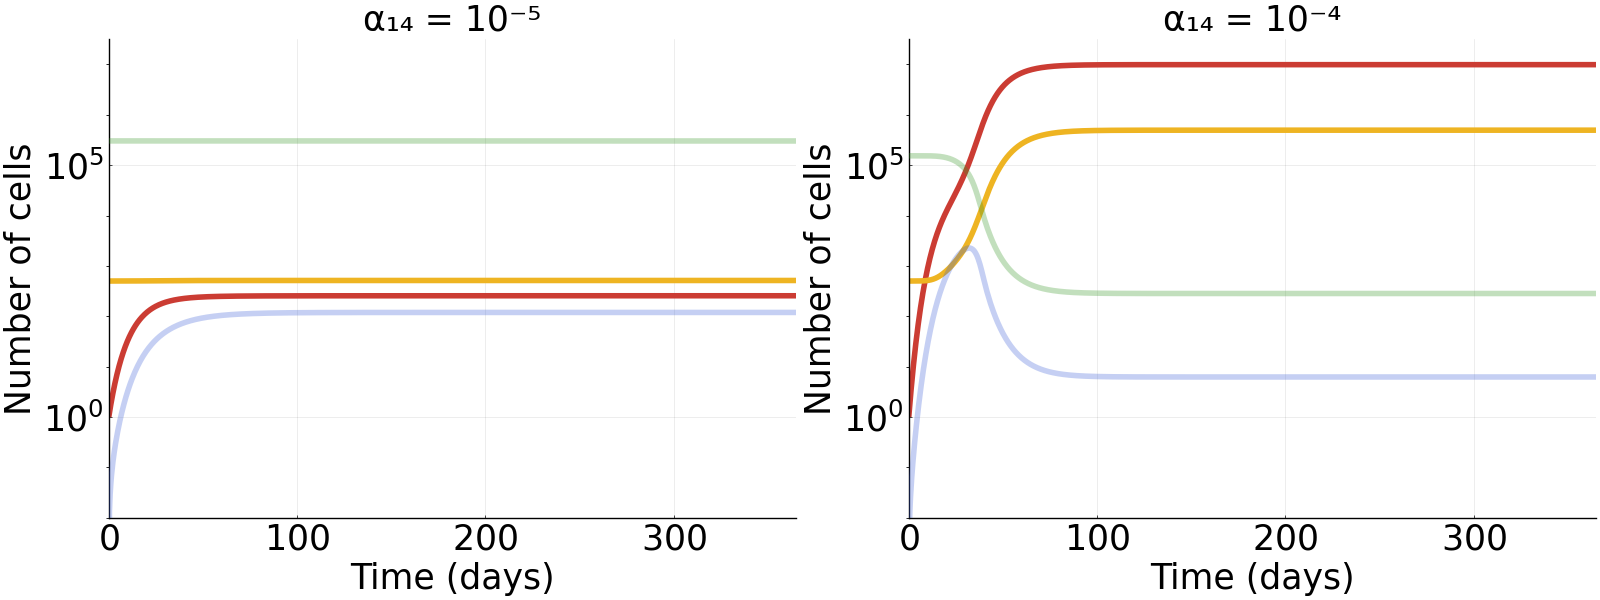

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


In [10]:
#plot results
l = @layout [e f]
logocolors = Colors.JULIA_LOGO_COLORS
e = plot(sol_panel_e, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "α₁₄ = 10⁻⁵",titlefontsize=25)
f = plot(sol_panel_f, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "α₁₄ = 10⁻⁴",titlefontsize=25)
plot(e, f, layout = l,size =(1600,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

# Morris global sensitivity analysis

In [1]:
using DiffEqSensitivity
using Statistics
using DiffEqCallbacks
using DifferentialEquations
using Plots; pyplot()
import Random

In [2]:
#define condition for simulation to end
function condition(u,t,integrator) 
  u[1] < 0.001 || u[2] < 0 || u[3] < 0 || u[4] < 0
end
floor_event = DiscreteCallback(condition, terminate!)

DiscreteCallback{typeof(condition), typeof(terminate!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, SciMLBase.terminate!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

In [3]:
#define model without delay
function model(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁,γ₁,γ₂,γ₃ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end


n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate 
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁,γ₁,γ₂,γ₃)
tspan = (0.0,1000.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]
prob = ODEProblem(model,u0,tspan,p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 1000.0)
u0: 4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [4]:
#set up function for sensitivity analysis
f = function (p)
  prob_func(prob,i,repeat) = remake(prob;p=p[:,i])
  ensemble_prob = EnsembleProblem(prob,prob_func=prob_func)
  sol = solve(ensemble_prob,DynamicSS(Tsit5()),maxiters=10^8,callback=floor_event,EnsembleThreads(),trajectories=size(p,2))
  out = zeros(2,size(p,2))
  for i in 1:size(p,2)
    out[1,i] = last(sol[i][1,:])
    out[2,i] = maximum(sol[i][1,:])
  end
  out
end

#1 (generic function with 1 method)

In [5]:
#perform sensitivity analysis (with set random seed for reproducibility)
Random.seed!(1212)
m = gsa(f,Morris(total_num_trajectory=1000,num_trajectory=100),[[0.0,10.0^(3.0)],[10.0^(7.0),10.0^(9.0)],[0.0,1.0],[10.0^(-2.0),5*10.0^(-1.0)],[10.0^(6.0),10.0^(8.0)],[10.0^(-7.0),10.0^(-6.0)],[10.0^(-7.0),10.0^(-6.0)],[0.0,0.1],[10.0^(3.0),10.0^(5.0)],[10.0^(-2.0),10.0^(-1.0)],[10.0^(-5.0),10.0^(-4.0)],[10.0^(-2.0),10.0^(-1.0)],[10.0^(-7.0),10.0^(-6.0)],[5*10.0^(-2.0),10.0^(-1.0)],[5*10.0^(-5.0),5*10.0^(-4.0)],[10.0^(-2.0),10.0^(-1.0)],[10.0^(9.0),10.0^(11.0)],[10.0^(6.0),10.0^(8.0)],[10.0^(6.0),10.0^(8.0)]],batch=true)

┌ Warning: Global Sensitivity Analysis has been moved to separate package GlobalSensitivity.jl (https://github.com/SciML/GlobalSensitivity.jl)
└ @ DiffEqSensitivity /Users/jessekreger/.julia/packages/DiffEqSensitivity/eq2wv/src/DiffEqSensitivity.jl:72


GlobalSensitivity.MorrisResult{Matrix{Float64}, Vector{Any}}([103.8344696972894 0.0827234381305023 … 3.43520352514367e-12 3.864730468167913e-12; 23.99386085502517 0.07978665228079046 … -6.538736768136621e-11 1.763852828175646e-10], [103.8344696972894 0.0827234381305023 … 3.5575649834085354e-12 5.020748309829591e-12; 24.00262445135873 0.07978665228079046 … 2.0523419684445813e-10 3.756531700540055e-10], [395551.26973389264 0.18519426437397224 … 2.9741082793698587e-22 3.3041444666551567e-22; 13191.366782654715 0.18509742400401089 … 2.5567647335860817e-19 1.316709347296986e-18], Any[[[0.00122219789028167, 0.0012214294876903224], [11.420257052578092, 11.738437334429536], [0.02151705019176006, 0.006817683063447474], [0.02113438016921281, 0.017145777314901346], [0.0314140431135891, 0.03326208841055612], [0.03141372667998092, 0.033653234280646024], [0.3243185933902859, 0.2085295208394527], [0.6330489314608274, 0.645588459972292], [0.0003285761028528231, 0.0003285735212266463], [0.0002791138049

In [6]:
#sensitivity analysis values
m.means

2×19 Matrix{Float64}:
 103.834   0.0827234  -2.78136e6  6.98486e7  …   3.4352e-12   3.86473e-12
  23.9939  0.0797867  -2.7827e6   6.9854e7      -6.53874e-11  1.76385e-10

In [7]:
#sensitivity analysis values
means1 = m.means[1,:]

19-element Vector{Float64}:
   103.8344696972894
     0.0827234381305023
    -2.781361929210716e6
     6.984862308510308e7
     0.6295350447383077
    -3.827662636775198e11
    -2.508288726318143e11
    -1.948159310844262e8
   -11.616760749003136
   -11.916890272520474
     1.5450483612850195e10
     1.02022025334263e7
    -6.598099691387153e11
    -4.11374612215201
     6.603439419340407e8
 26002.62770892652
    -9.691851005675228e-6
     3.43520352514367e-12
     3.864730468167913e-12

In [8]:
#sensitivity analysis values
means2 = m.means[2,:]

19-element Vector{Float64}:
    23.99386085502517
     0.07978665228079046
    -2.7827002064856687e6
     6.98540132622206e7
     0.6295622309949296
    -3.905575324244998e11
    -1.7302749621476126e11
    -1.9479733474026015e8
   -11.613518093310768
   -11.462813290549066
     1.5450344489022335e10
     1.020969971758107e7
    -6.616862226515463e11
    -5.139156942357431
     4.293746076578792e8
 26058.330557225483
    -9.518827315020692e-6
    -6.538736768136621e-11
     1.763852828175646e-10

In [9]:
#sensitivity analysis values
m.variances

2×19 Matrix{Float64}:
     3.95551e5  0.185194  7.63618e13  1.61362e16  …  2.97411e-22  3.30414e-22
 13191.4        0.185097  7.63527e13  1.61354e16     2.55676e-19  1.31671e-18

In [10]:
#using absolute value for plotting
for i = 1:length(means1)
   means1[i] = abs(means1[i]) 
   means2[i] = abs(means2[i]) 
end

In [11]:
#sensitivity analysis values
means1

19-element Vector{Float64}:
   103.8344696972894
     0.0827234381305023
     2.781361929210716e6
     6.984862308510308e7
     0.6295350447383077
     3.827662636775198e11
     2.508288726318143e11
     1.948159310844262e8
    11.616760749003136
    11.916890272520474
     1.5450483612850195e10
     1.02022025334263e7
     6.598099691387153e11
     4.11374612215201
     6.603439419340407e8
 26002.62770892652
     9.691851005675228e-6
     3.43520352514367e-12
     3.864730468167913e-12

In [12]:
#sensitivity analysis values
means2

19-element Vector{Float64}:
    23.99386085502517
     0.07978665228079046
     2.7827002064856687e6
     6.98540132622206e7
     0.6295622309949296
     3.905575324244998e11
     1.7302749621476126e11
     1.9479733474026015e8
    11.613518093310768
    11.462813290549066
     1.5450344489022335e10
     1.020969971758107e7
     6.616862226515463e11
     5.139156942357431
     4.293746076578792e8
 26058.330557225483
     9.518827315020692e-6
     6.538736768136621e-11
     1.763852828175646e-10

┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617


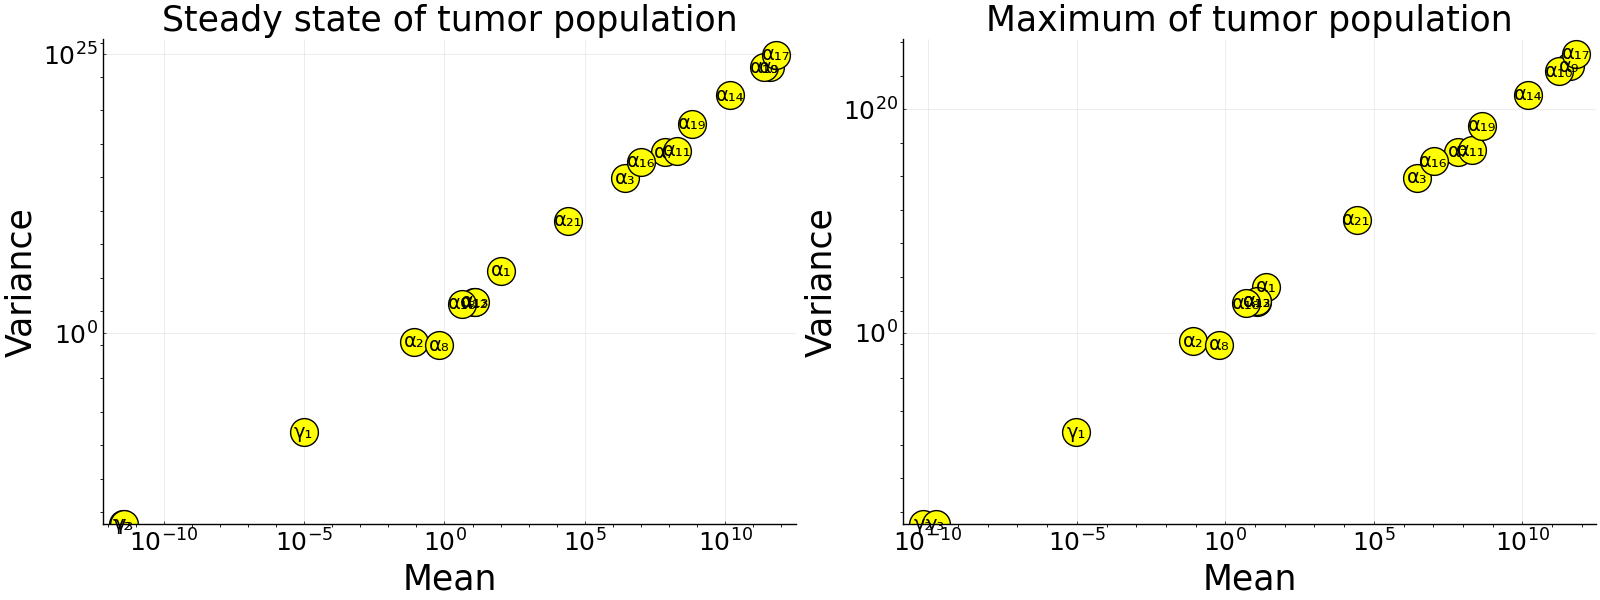

In [13]:
#plot results
l = @layout [a b]
plot1 = scatter(means1, m.variances[1,:],series_annotations=[:α₁,:α₂,:α₃,:α₇,:α₈,:α₉,:α₁₀,:α₁₁,:α₁₂,:α₁₃,:α₁₄,:α₁₆,:α₁₇,:α₁₈,:α₁₉,:α₂₁,:γ₁,:γ₂,:γ₃],seriescolor=[:yellow :red :green],xscale=:log,yscale=:log,markersize=20,legend=false, title = "Steady state of tumor population", xlabel = "Mean", ylabel = "Variance")
plot2 = scatter(means2, m.variances[2,:],series_annotations=[:α₁,:α₂,:α₃,:α₇,:α₈,:α₉,:α₁₀,:α₁₁,:α₁₂,:α₁₃,:α₁₄,:α₁₆,:α₁₇,:α₁₈,:α₁₉,:α₂₁,:γ₁,:γ₂,:γ₃],color=:yellow,xscale=:log,yscale=:log,markersize=20,legend=false, title = "Maximum of tumor population", xlabel = "Mean", ylabel = "Variance")
plot(plot1, plot2, layout = l,size =(1600,600),xtickfont=font(18),ytickfont=font(18),guidefont=font(25),legendfont=font(25),titlefont=font(25))

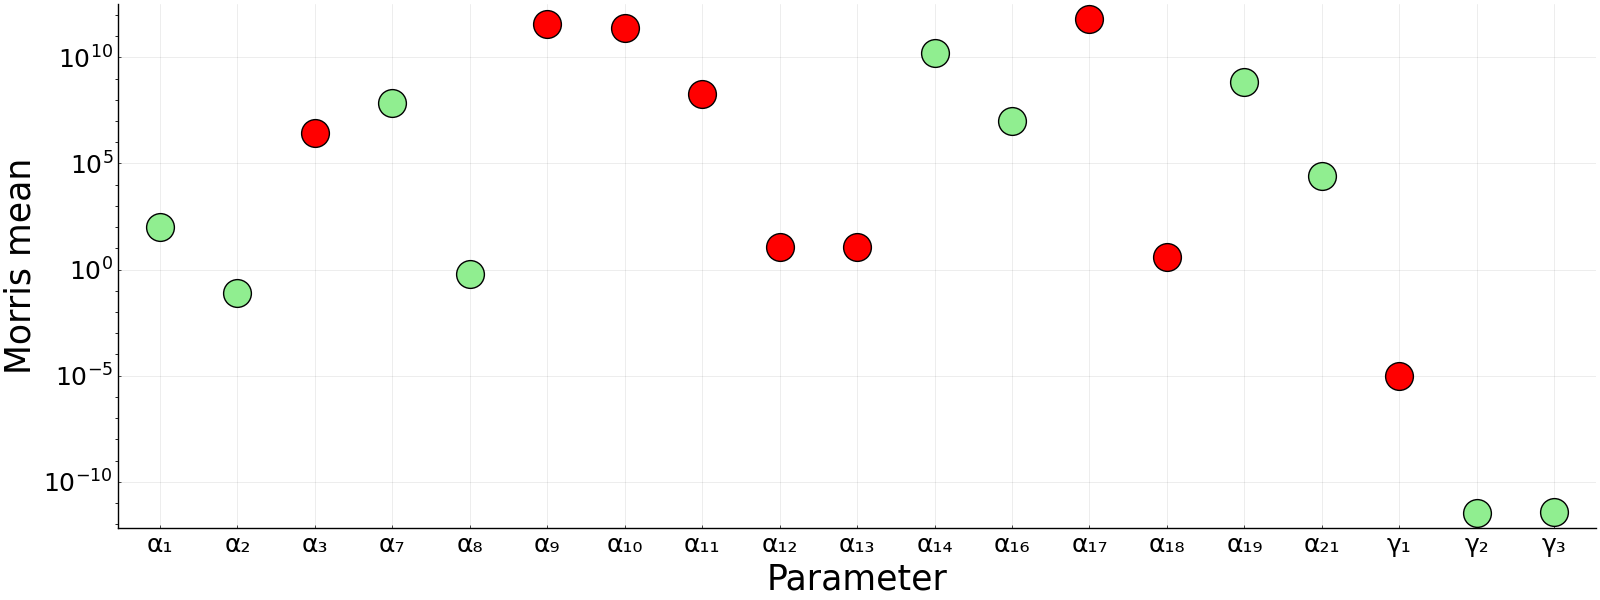

In [15]:
#plot results
plot_justmean = scatter(["α₁","α₂","α₃","α₇","α₈","α₉","α₁₀","α₁₁","α₁₂","α₁₃","α₁₄","α₁₆","α₁₇","α₁₈","α₁₉","α₂₁","γ₁","γ₂","γ₃"],means1,color=[:lightgreen, :lightgreen, :red, :lightgreen, :lightgreen, :red, :red, :red, :red, :red, :lightgreen, :lightgreen, :red, :red, :lightgreen, :lightgreen, :red, :lightgreen, :lightgreen],yscale=:log10,markersize=20,legend=false, title = "", xlabel = "Parameter", ylabel = "Morris mean") #mean of tumor population
plot(plot_justmean,size =(1600,600),xtickfont=font(18),ytickfont=font(18),guidefont=font(25),legendfont=font(25),titlefont=font(25), xticks = :all)

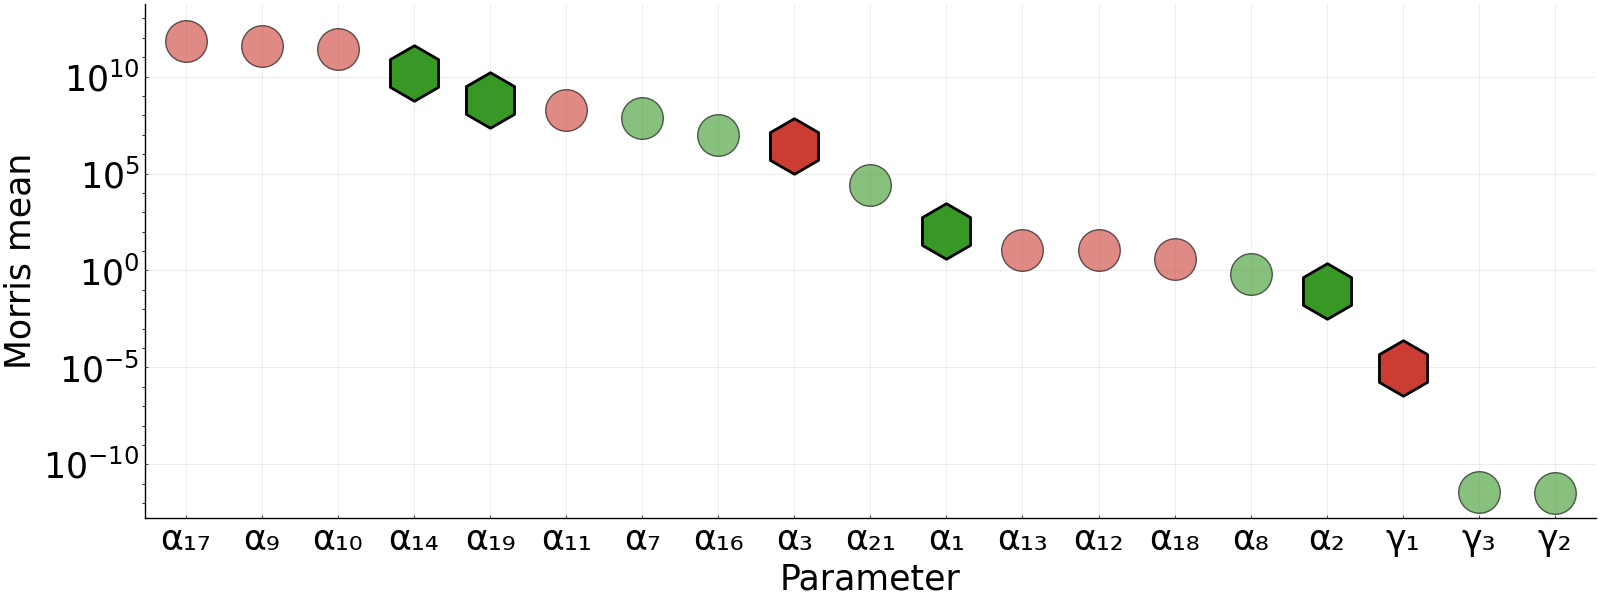

In [16]:
#plot results
vector_1 = ["α₁₇", "α₉", "α₁₀", "α₁₄", "α₁₉", "α₁₁", "α₇", "α₁₆", "α₃", "α₂₁", "α₁", "α₁₃", "α₁₂", "α₁₈", "α₈", "α₂", "γ₁", "γ₃", "γ₂"]
vector_2 = [6.60E+11,3.83E+11,2.51E+11,1.55E+10,6.60E+08,1.95E+08,6.98E+07,1.02E+07,2.78E+06,26002.62771,103.8344697,11.91689027,11.61676075,4.113746122,0.629535045,0.082723438,9.69E-06,3.86E-12,3.44E-12]

non_MDSC_size = 30
MDSC_size = 40

non_MDSC_alpha = 0.6
MDSC_alpha = 1

non_MDSC_strokewidth = 1
MDSC_strokewidth = 2

color_positive = [95,177,42]
color_negative = [226,58,52]

logocolors = Colors.JULIA_LOGO_COLORS

vector_size = [non_MDSC_size,non_MDSC_size,non_MDSC_size,MDSC_size,MDSC_size,non_MDSC_size,non_MDSC_size,non_MDSC_size,MDSC_size,non_MDSC_size,MDSC_size,non_MDSC_size,non_MDSC_size,non_MDSC_size,non_MDSC_size,MDSC_size,MDSC_size,non_MDSC_size,non_MDSC_size]
vector_alpha = [non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,MDSC_alpha,MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,MDSC_alpha,non_MDSC_alpha,MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,MDSC_alpha,MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha]
vector_color = [logocolors.red, logocolors.red, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.red, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.green, logocolors.green]
vector_strokewidth = [non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth]
vector_shape = [:circle, :circle, :circle, :hexagon, :hexagon, :circle, :circle, :circle, :hexagon, :circle, :hexagon, :circle, :circle, :circle, :circle, :hexagon, :hexagon, :circle, :circle]

plot_justmean = scatter(vector_1,vector_2,color=vector_color,yscale=:log10,markersize=vector_size, alpha = vector_alpha, markerstrokewidth = vector_strokewidth, markershape = vector_shape, legend=false, title = "", xlabel = "Parameter", ylabel = "Morris mean", ylims = [10^(-12), 10^13]) #mean of tumor population
plot(plot_justmean,size =(1600,600),font = "Ariel",xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),titlefont=font(25),xticks = :all)

# Basic dynamics stochastic successful tumors

In [1]:
using DifferentialEquations
using Plots; pyplot()
using StochasticDelayDiffEq
using DiffEqCallbacks
using Statistics
import Random

In [2]:
#define model with delay
function dde_system(du,u,h,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
    histC_MDSC = h(p, t-τ₁; idxs=1)
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*histC_MDSC/(γ₁+(histC_MDSC^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

dde_system (generic function with 1 method)

In [3]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

ode_system (generic function with 1 method)

In [4]:
#define initial number of tumor cells for delay model
h2(p, t; idxs=nothing) = typeof(idxs) <: Number ? 1.0 : ones(4).+ 1
h2(1,0)

4-element Vector{Float64}:
 2.0
 2.0
 2.0
 2.0

In [5]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [2.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      2.0
    500.0
 228758.1699346405
      0.0

In [6]:
#define stochastic noise
W = WienerProcess(0.0,0.0,0.0)

function σfunction(du,u,h,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

function σfunction_nodelay(du,u,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

σfunction_nodelay (generic function with 1 method)

In [7]:
#define conditions for simulation to end
function condition(u,t,integrator) 
  u[1] < 1
end

function floor_aff!(integrator)
    integrator.u[1]=1.0
end

function terminate_affect!(integrator)
    terminate!(integrator)
end

floor_event = DiscreteCallback(condition, terminate!)
floor_event2 = DiscreteCallback(condition, floor_aff!)

DiscreteCallback{typeof(condition), typeof(floor_aff!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, floor_aff!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

## Panel a

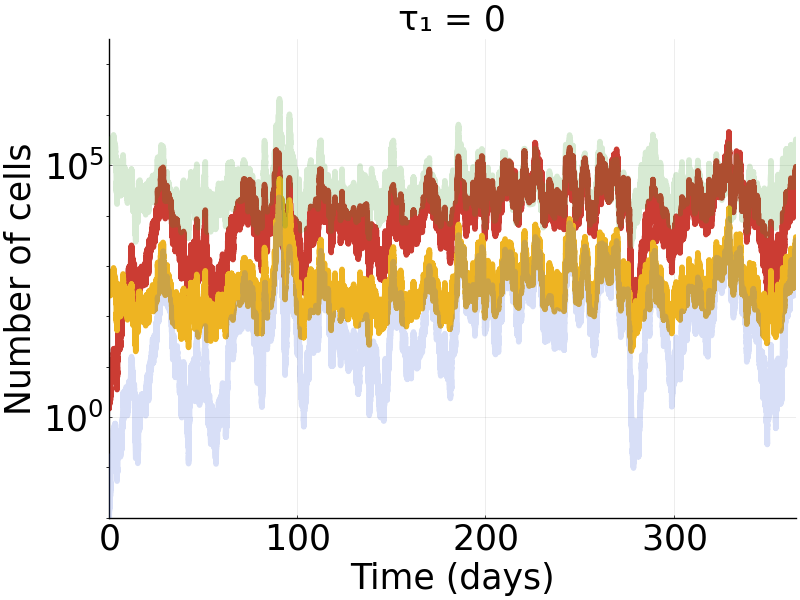

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


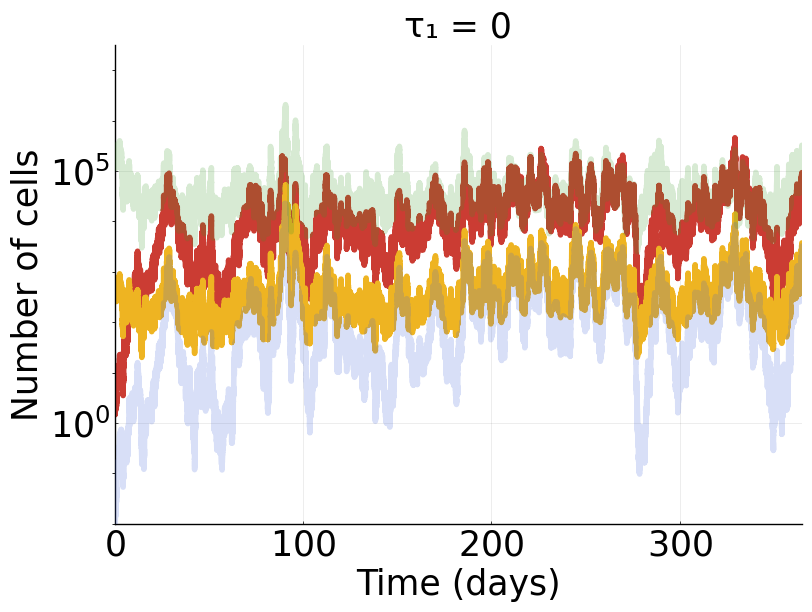

100.0
13917.114726692322

In [8]:
#solve with τ₁ = 0 (with set random seed for reproducibility)
runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1236)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

for i in 1:runs
    prob_nodelay = SDEProblem(ode_system,σfunction_nodelay,u0,tspan,p,noise=W)
    sol = solve(prob_nodelay,SOSRI(),callback=floor_event)
   
    A = minimum(sol[1,:])    
    
    if A ≥ threshold
        tumorsuccess = tumorsuccess + 1
        meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
        plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25) 

        display(plot1)
    else
        for j in 1:length(sol[1,:])
            global BB = j
            if sol[1,j] < threshold
                break
            end
        end
        plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
        display(plot1)
    end
    
    if (mod(i,runs/100) == 0)
        print(i, " ", tumorsuccess, " ", tumorsuccess/i, " ", meanofsuccessfulltumors/tumorsuccess, "\n")
    end
    
    
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel b

10.0


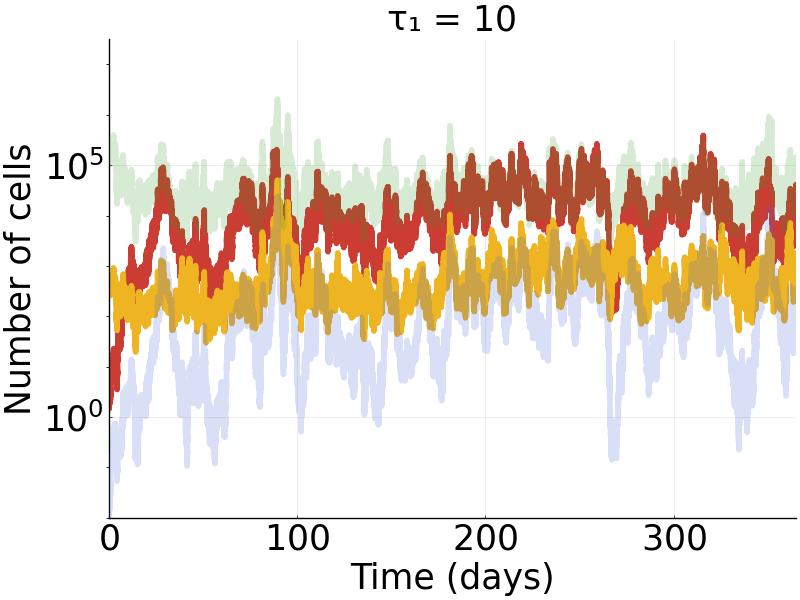

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


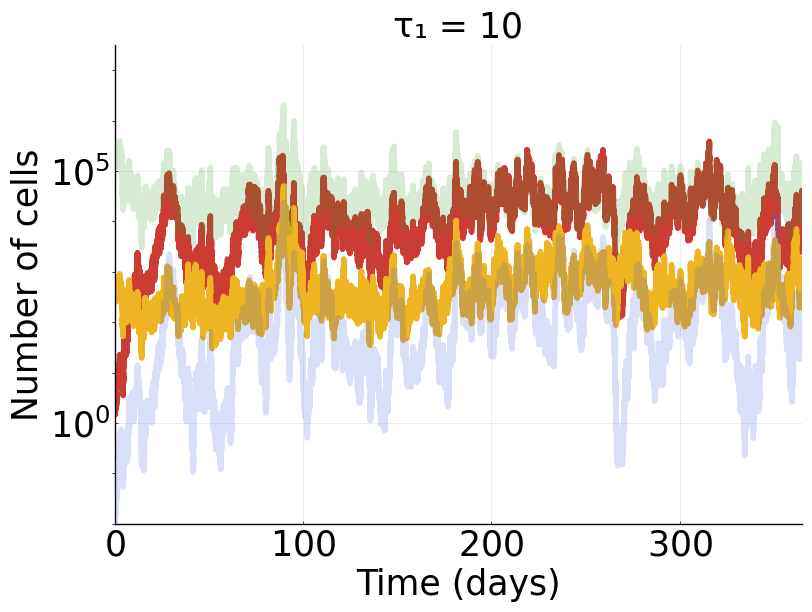

100.0
13818.005584217335

In [9]:
#solve with τ₁ = 10 (with set random seed for reproducibility)
τ₁ = 10.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1236)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

for i in 1:runs
    
    prob1 = SDDEProblem(dde_system,σfunction,u0,h2,tspan,p; constant_lags=lags,noise=W)
    sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)
   
    A = minimum(sol[1,:])    
    
    if A ≥ threshold
        tumorsuccess = tumorsuccess + 1
        meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
        plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25) 

        display(plot1)
    else
        for j in 1:length(sol[1,:])
            global BB = j
            if sol[1,j] < threshold
                break
            end
        end
        plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)
        display(plot1)
    end
    
    if (mod(i,runs/100) == 0)
        print(i, " ", tumorsuccess, " ", tumorsuccess/i, " ", meanofsuccessfulltumors/tumorsuccess, "\n")
    end
    
    
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel c

50.0


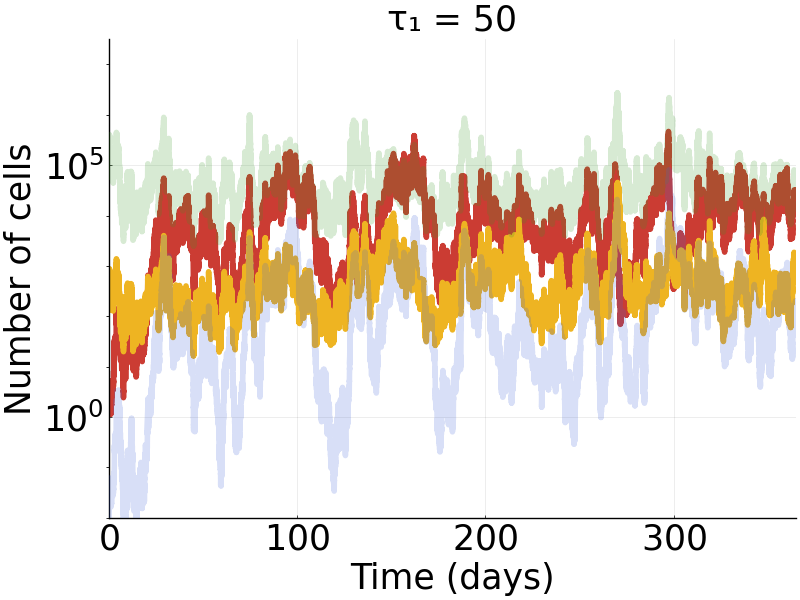

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


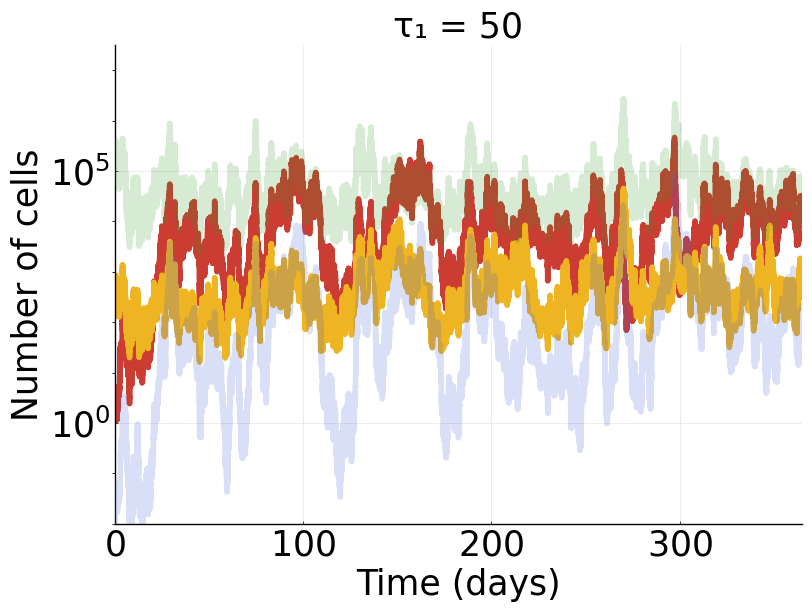

100.0
10683.775036387853

In [10]:
#solve with τ₁ = 50 (with set random seed for reproducibility)
τ₁ = 50.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1238)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

for i in 1:runs
    
    prob1 = SDDEProblem(dde_system,σfunction,u0,h2,tspan,p; constant_lags=lags,noise=W)
    sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)
   
    A = minimum(sol[1,:])    
    
    if A ≥ threshold
        tumorsuccess = tumorsuccess + 1
        meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
        plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25) 

        display(plot1)
    else
        for j in 1:length(sol[1,:])
            global BB = j
            if sol[1,j] < threshold
                break
            end
        end
        plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)
        display(plot1)
    end
    
    if (mod(i,runs/100) == 0)
        print(i, " ", tumorsuccess, " ", tumorsuccess/i, " ", meanofsuccessfulltumors/tumorsuccess, "\n")
    end
    
    
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel d

365.0


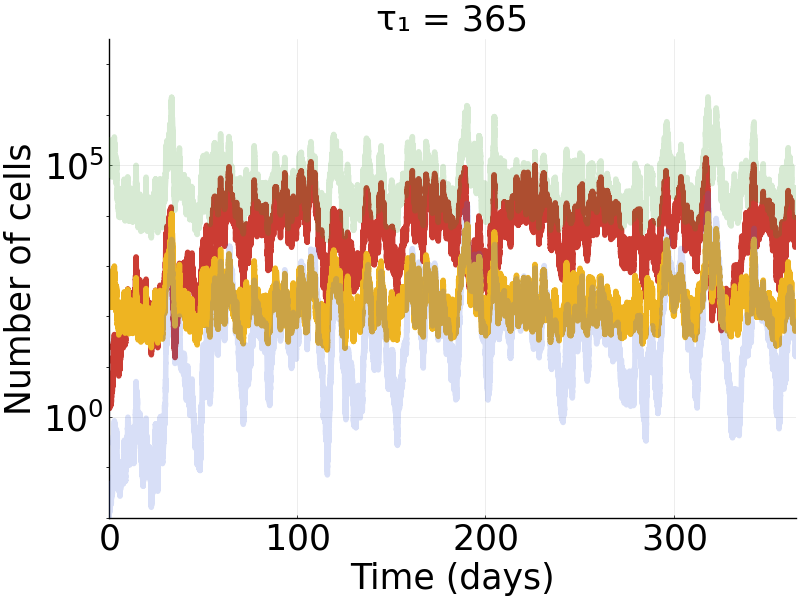

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


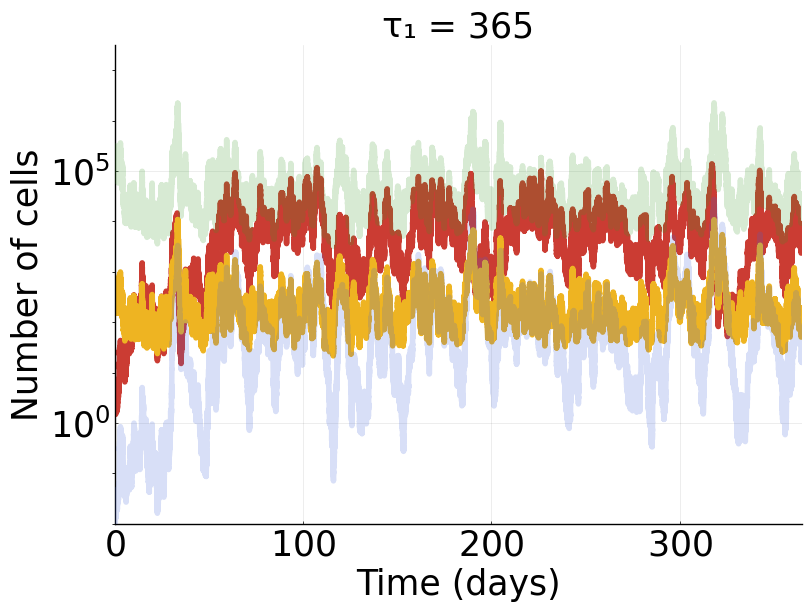

100.0
7103.068929213383

In [11]:
#solve with τ₁ = 365 (with set random seed for reproducibility)
τ₁ = 365.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1244)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

for i in 1:runs
    
    prob1 = SDDEProblem(dde_system,σfunction,u0,h2,tspan,p; constant_lags=lags,noise=W)
    sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)
   
    A = minimum(sol[1,:])    
    
    if A ≥ threshold
        tumorsuccess = tumorsuccess + 1
        meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
        plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25) 

        display(plot1)
    else
        for j in 1:length(sol[1,:])
            global BB = j
            if sol[1,j] < threshold
                break
            end
        end
        plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)
        display(plot1)
    end
    
    if (mod(i,runs/100) == 0)
        print(i, " ", tumorsuccess, " ", tumorsuccess/i, " ", meanofsuccessfulltumors/tumorsuccess, "\n")
    end
    
    
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

# Basic dynamics stochastic unsuccessful tumors

In [1]:
using DifferentialEquations
using Plots; pyplot()
using StochasticDelayDiffEq
using DiffEqCallbacks
using Statistics 
import Random

In [12]:
#define model with delay
function dde_system(du,u,h,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
    histC_MDSC = h(p, t-τ₁; idxs=1)
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*histC_MDSC/(γ₁+(histC_MDSC^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

dde_system (generic function with 1 method)

In [13]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T 
end

ode_system (generic function with 1 method)

In [14]:
#define initial number of tumor cells for delay model
h2(p, t; idxs=nothing) = typeof(idxs) <: Number ? 1.0 : ones(4).+ 1
h2(1,0)

4-element Vector{Float64}:
 2.0
 2.0
 2.0
 2.0

In [15]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [2.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      2.0
    500.0
 228758.1699346405
      0.0

In [16]:
#define stochastic noise
W = WienerProcess(0.0,0.0,0.0)

function σfunction(du,u,h,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

function σfunction_nodelay(du,u,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

σfunction_nodelay (generic function with 1 method)

In [17]:
#define conditions for simulation to end
function condition(u,t,integrator) 
  u[1] < 1
end

function floor_aff!(integrator)
    integrator.u[1]=1.0
end

function terminate_affect!(integrator)
    terminate!(integrator)
end

floor_event = DiscreteCallback(condition, terminate!)
floor_event2 = DiscreteCallback(condition, floor_aff!)

DiscreteCallback{typeof(condition), typeof(floor_aff!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, floor_aff!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

## Panel a

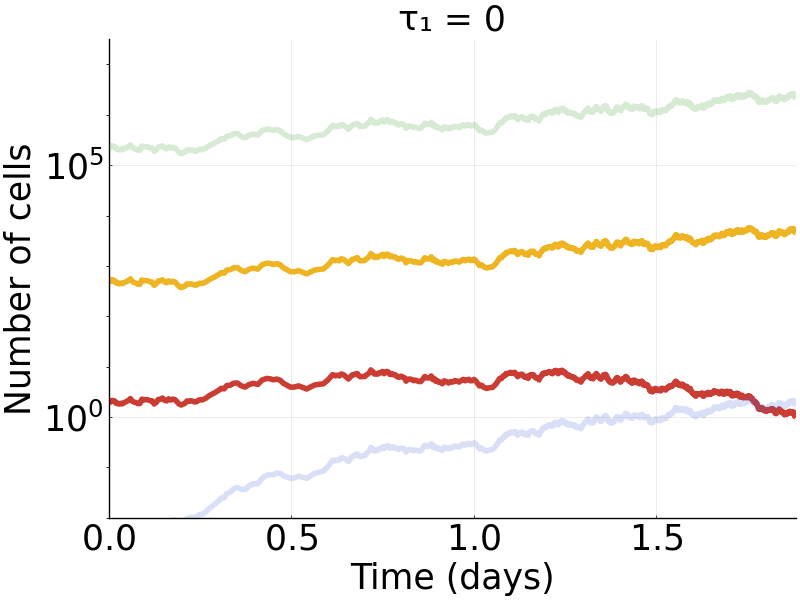

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


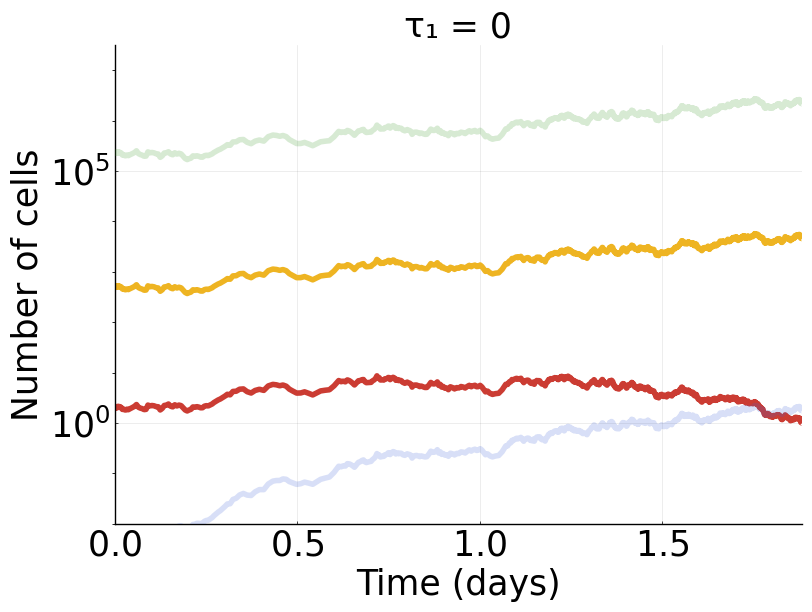

0.0
NaN

In [18]:
#solve with τ₁ = 0 (with set random seed for reproducibility)
runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1234)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

for i in 1:runs
    prob_nodelay = SDEProblem(ode_system,σfunction_nodelay,u0,tspan,p,noise=W)
    sol = solve(prob_nodelay,SOSRI(),callback=floor_event)
   
    A = minimum(sol[1,:])    
    
    if A ≥ threshold
        tumorsuccess = tumorsuccess + 1
        meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
        plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25) 

        display(plot1)
    else
        for j in 1:length(sol[1,:])
            global BB = j
            if sol[1,j] < threshold
                break
            end
        end
        plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
        display(plot1)
    end
    
    if (mod(i,runs/100) == 0)
        print(i, " ", tumorsuccess, " ", tumorsuccess/i, " ", meanofsuccessfulltumors/tumorsuccess, "\n")
    end
    
    
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel b

10.0


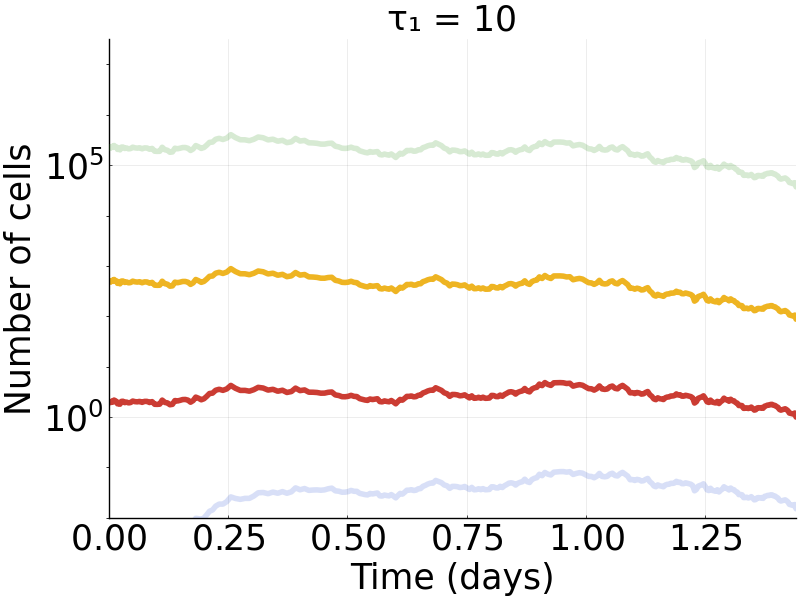

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


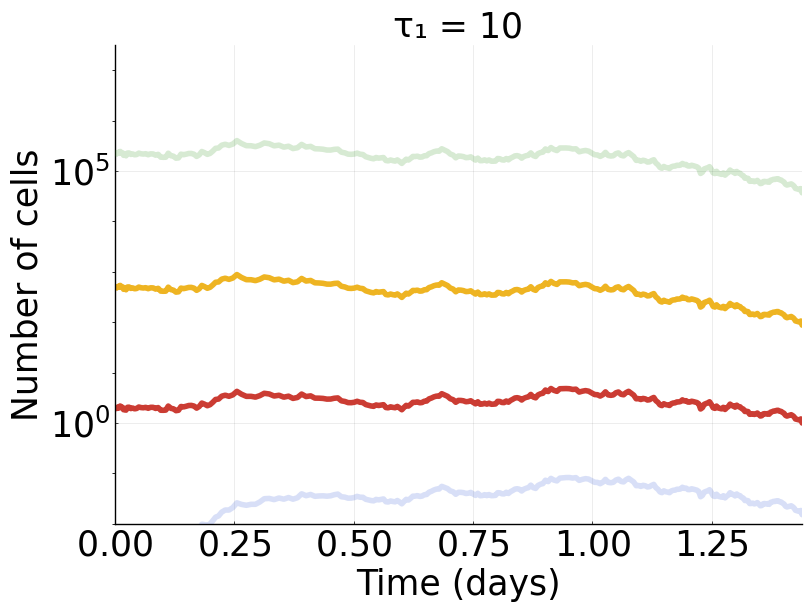

0.0
NaN

In [19]:
#solve with τ₁ = 10 (with set random seed for reproducibility)
τ₁ = 10.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1230)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

for i in 1:runs
    
    prob1 = SDDEProblem(dde_system,σfunction,u0,h2,tspan,p; constant_lags=lags,noise=W)
    sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)
   
    A = minimum(sol[1,:])    
    
    if A ≥ threshold
        tumorsuccess = tumorsuccess + 1
        meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
        plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25) 

        display(plot1)
    else
        for j in 1:length(sol[1,:])
            global BB = j
            if sol[1,j] < threshold
                break
            end
        end
        plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)
        display(plot1)
    end
    
    if (mod(i,runs/100) == 0)
        print(i, " ", tumorsuccess, " ", tumorsuccess/i, " ", meanofsuccessfulltumors/tumorsuccess, "\n")
    end
    
    
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel c

50.0


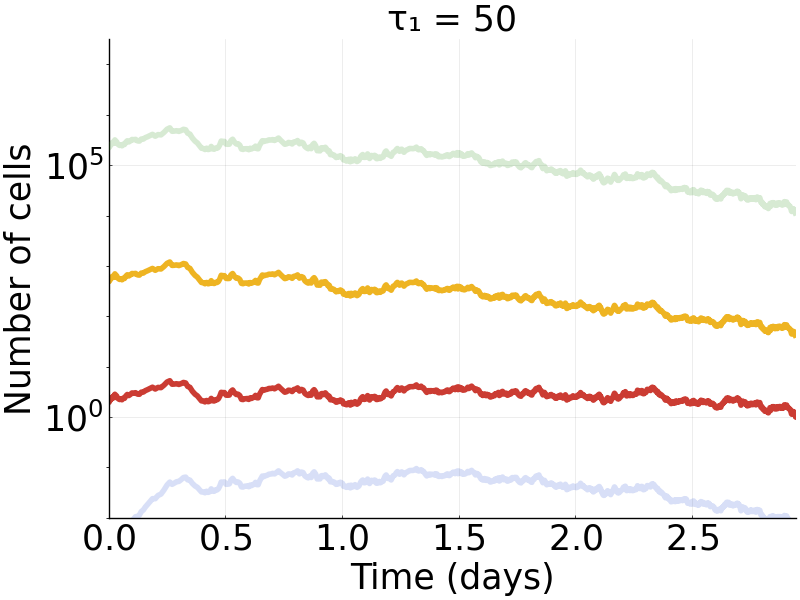

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


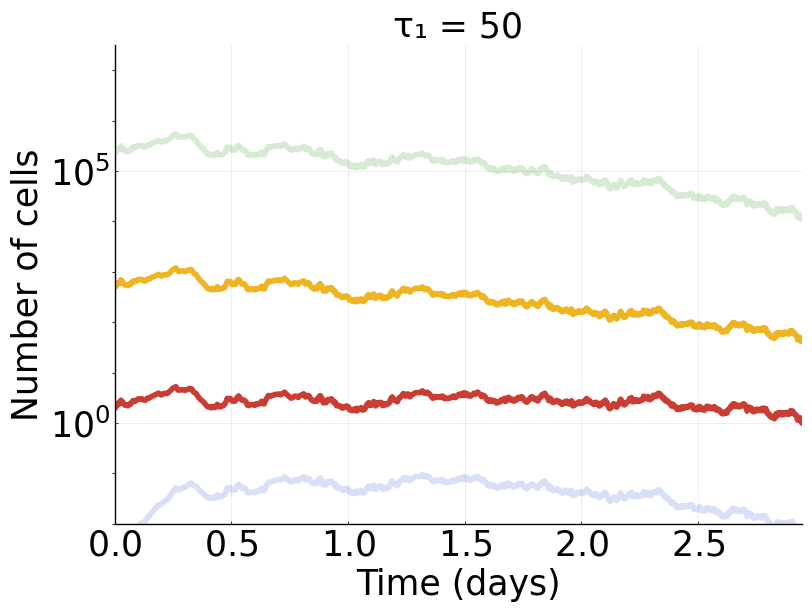

0.0
NaN

In [20]:
#solve with τ₁ = 50 (with set random seed for reproducibility)
τ₁ = 50.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1269)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

for i in 1:runs
    
    prob1 = SDDEProblem(dde_system,σfunction,u0,h2,tspan,p; constant_lags=lags,noise=W)
    sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)
   
    A = minimum(sol[1,:])    
    
    if A ≥ threshold
        tumorsuccess = tumorsuccess + 1
        meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
        plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25) 

        display(plot1)
    else
        for j in 1:length(sol[1,:])
            global BB = j
            if sol[1,j] < threshold
                break
            end
        end
        plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)
        display(plot1)
    end
    
    if (mod(i,runs/100) == 0)
        print(i, " ", tumorsuccess, " ", tumorsuccess/i, " ", meanofsuccessfulltumors/tumorsuccess, "\n")
    end
    
    
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel d

365.0


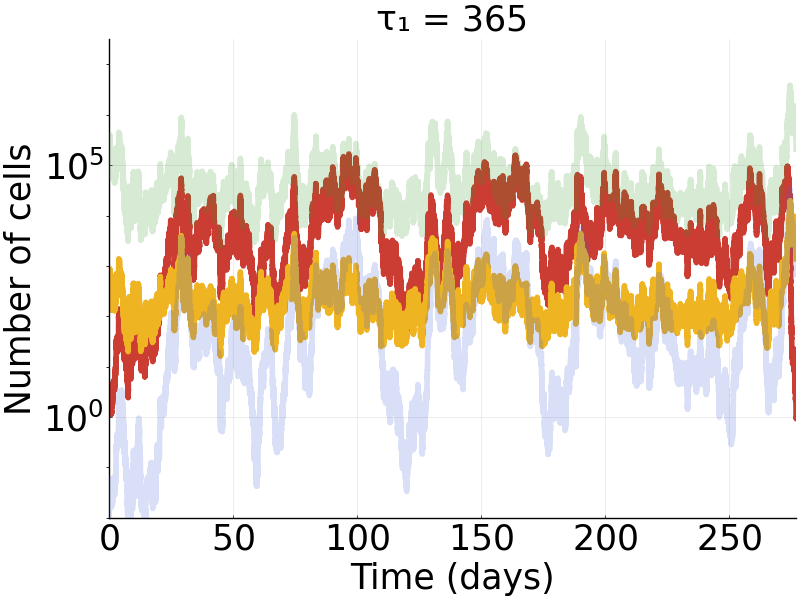

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


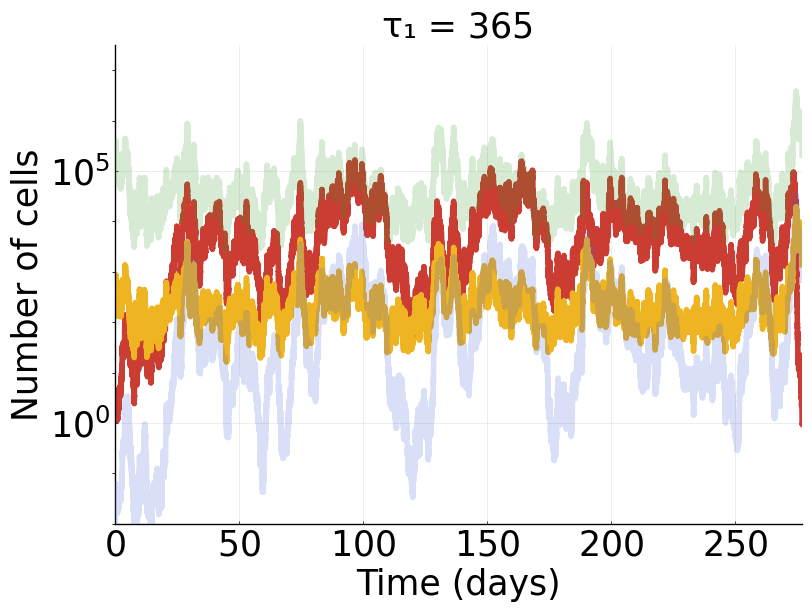

0.0
NaN

In [21]:
#solve with τ₁ = 365 (with set random seed for reproducibility)
τ₁ = 365.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1238)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

for i in 1:runs
    
    prob1 = SDDEProblem(dde_system,σfunction,u0,h2,tspan,p; constant_lags=lags,noise=W)
    sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)
   
    A = minimum(sol[1,:])    
    
    if A ≥ threshold
        tumorsuccess = tumorsuccess + 1
        meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
        plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25) 

        display(plot1)
    else
        for j in 1:length(sol[1,:])
            global BB = j
            if sol[1,j] < threshold
                break
            end
        end
        plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)
        display(plot1)
    end
    
    if (mod(i,runs/100) == 0)
        print(i, " ", tumorsuccess, " ", tumorsuccess/i, " ", meanofsuccessfulltumors/tumorsuccess, "\n")
    end
    
    
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

# Delay plots

In [1]:
using Plots; pyplot()

Plots.PyPlotBackend()

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

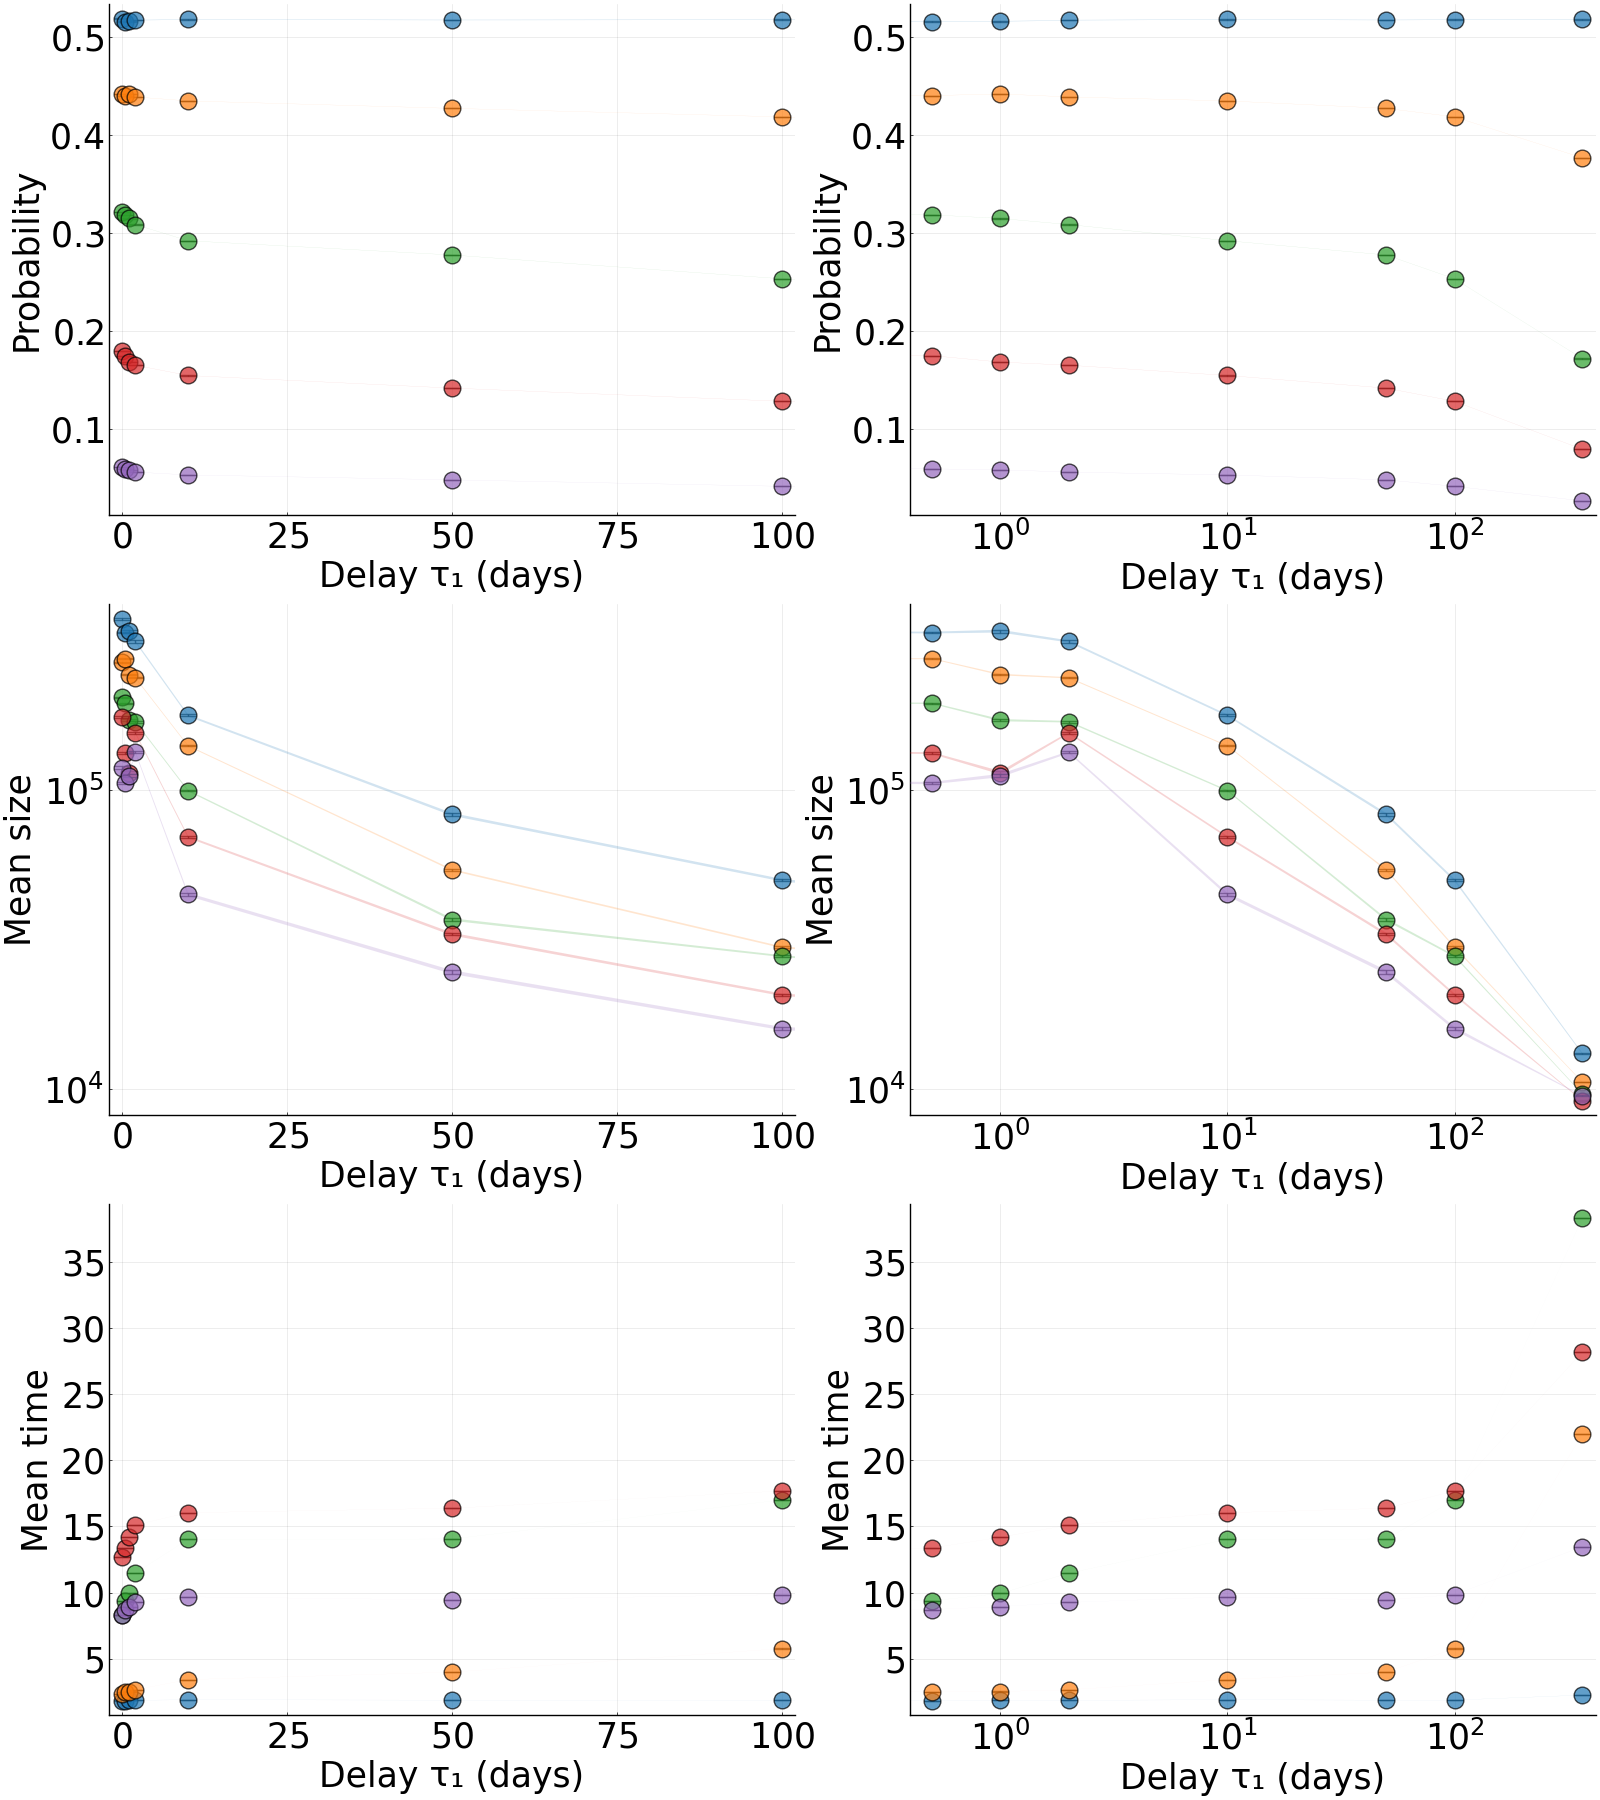

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

In [2]:
#plot for α₁
l = @layout [a b; c d; e f]
delays = [0,0.5,1,2,10,50,100,365]

prob_success200 = [0.519082,0.516154,0.516328,0.517513,0.518441,0.517741,0.518158,0.518395]
prob_sigma200 = [0.499636,0.499741,0.499736,0.499696,0.499662,0.499687,0.499672,0.499663]
mean200 = [370658,334958,338588,312759,177017,82744.3,49886.3,13167.1]
mean_sigma200 = [5.20123*10^6,4.32565*10^6,6.88233*10^6,4.86994*10^6,2.60007*10^6,1.6687*10^6,932055,133877]
number_of_sims200 = [sqrt(616779),sqrt(100098),sqrt(101052),sqrt(102212),sqrt(101487),sqrt(110959),sqrt(119230),sqrt(251073)]
time200 = [1.85276,1.82553,1.8898,1.87804,1.90961,1.88617,1.88841,2.26509]
time_sigma200 =[8.10459,7.70764,8.87297,8.71036,8.84831,8.46474,8.25971,12.8756]

prob_success150 = [0.441975,0.440428,0.442177,0.439049,0.435014,0.427383,0.418694,0.37684]
prob_sigma150 = [0.496622,0.496441,0.496648,0.496273,0.495761,0.494701,0.493347,0.484595]
mean150 = [266557,273975,242439,236532,140120,53984.8,29773.3,10561.7]
mean_sigma150 = [4.51004*10^6,6.01181*10^6,3.60144*10^6,3.29097*10^6,2.61695*10^6,831546,448688,28718.3]
number_of_sims150 = [sqrt(793617),sqrt(111941),sqrt(110182),sqrt(110236),sqrt(110463),sqrt(119979),sqrt(131841),sqrt(268337)]
time150 = [2.35016,2.51467,2.53572,2.668,3.43652,3.99709,5.78299,21.9719]
time_sigma150 =[11.5959,13.1953,13.4911,14.1911,18.8904,18.7153,23.2894,66.3526]

prob_success100 = [0.3212,0.318552,0.314825,0.308597,0.292063,0.277498,0.253164,0.171663]
prob_sigma100 = [0.466938,0.465916,0.464448,0.461916,0.454713,0.447765,0.434825,0.377087]
mean100 = [203337.,194461.,170731.,168658.,99267.2,36850.8,27812.4,9651.36]
mean_sigma100 = [3.78348*10^6,3.86514*10^6,2.42093*10^6,3.13946*10^6,1.60149*10^6,492169.,950355.,2449.4]
number_of_sims100 = [sqrt(973914),sqrt(152013),sqrt(150909),sqrt(150737),sqrt(149697),sqrt(165533),sqrt(178991),sqrt(356193)]
time100 = [8.32364,9.38726,9.94577,11.4757,14.0353,14.0563,17.0094,38.2654]
time_sigma100 =[38.304,41.5288,42.7576,46.6773,51.7383,48.0522,50.2944,83.4195]

prob_success50 = [0.1792,0.174584,0.168,0.164824,0.154306,0.141408,0.127911,0.0789714]
prob_sigma50 = [0.38352,0.379613,0.373868,0.371024,0.361244,0.348444,0.333992,0.269695]
mean50 = [175018,132509,113949,154819,69540.7,32945.7,20664.1,9157.35]
mean_sigma50 = [6.44706*10^6,3.30919*10^6,1.66988*10^6,4.27947*10^6,1.096*10^6,470345,242785,2325.03]
number_of_sims50 = [sqrt(585536),sqrt(103194),sqrt(102155),sqrt(100780),sqrt(100132),sqrt(110807),sqrt(120154),sqrt(240758)]
time50 = [12.7295,13.3758,14.1921,15.1125,16.0425,16.3786,17.6821,28.1505]
time_sigma50 =[49.6438,50.9589,52.5218,54.1309,55.3016,53.9223,53.9077,71.2822]

prob_success0 = [0.06089,0.0588417,0.0579388,0.0555525,0.0526417,0.0476214,0.0410184,0.0261306]
prob_sigma0 = [0.239129,0.235329,0.233628,0.229056,0.223318,0.212965,0.198333,0.159524]
mean0 = [118527,105306,111543,133400,44684.7,24598.3,15932.3,9495.51]
mean_sigma0 = [2.81917*10^6,1.45912*10^6,2.64402*10^6,4.36827*10^6,530133,290079,222918,2372.49]
number_of_sims0 = [sqrt(447512),sqrt(152409),sqrt(161291),sqrt(162405),sqrt(150622),sqrt(143423),sqrt(174629),sqrt(216681)]
time0 = [8.31242,8.72747,8.94725,9.2645,9.6889,9.44982,9.85561,13.4649]
time_sigma0 =[39.4993,40.3411,40.8846,41.7095,42.6883,40.602,40.662,49.4783]

prob_success = [prob_success200 prob_success150 prob_success100 prob_success50 prob_success0]
prob_sigma = [prob_sigma200/number_of_sims200 prob_sigma150/number_of_sims150 prob_sigma100/number_of_sims100 prob_sigma50/number_of_sims50 prob_sigma0/number_of_sims0]

mean = [mean200 mean150 mean100 mean50 mean0]
mean_sigma = [mean_sigma200/number_of_sims200 mean_sigma150/number_of_sims150 mean_sigma100/number_of_sims100 mean_sigma50/number_of_sims50 mean_sigma0/number_of_sims0]

time = [time200 time150 time100 time50 time0]
time_sigma = [time_sigma200/number_of_sims200 time_sigma150/number_of_sims150 time_sigma100/number_of_sims100 time_sigma50/number_of_sims50 time_sigma0/number_of_sims0]

#label = ["α₁ = 200" "α₁ = 150" "α₁ = 100" "α₁ = 50" "α₁ = 0"]

p1 = plot(delays,prob_success,yerror=prob_sigma,ribbon=prob_sigma,fillalpha= 0.2,grid=true,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel") #xlims = (-15,380)
p3 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p2 = plot(delays,prob_success,yerror=prob_sigma,grid=true,ribbon=prob_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p4 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p5 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p6 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
plot(p1, p2, p3, p4, p5, p6, layout = l,size =(1600,1800),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30z

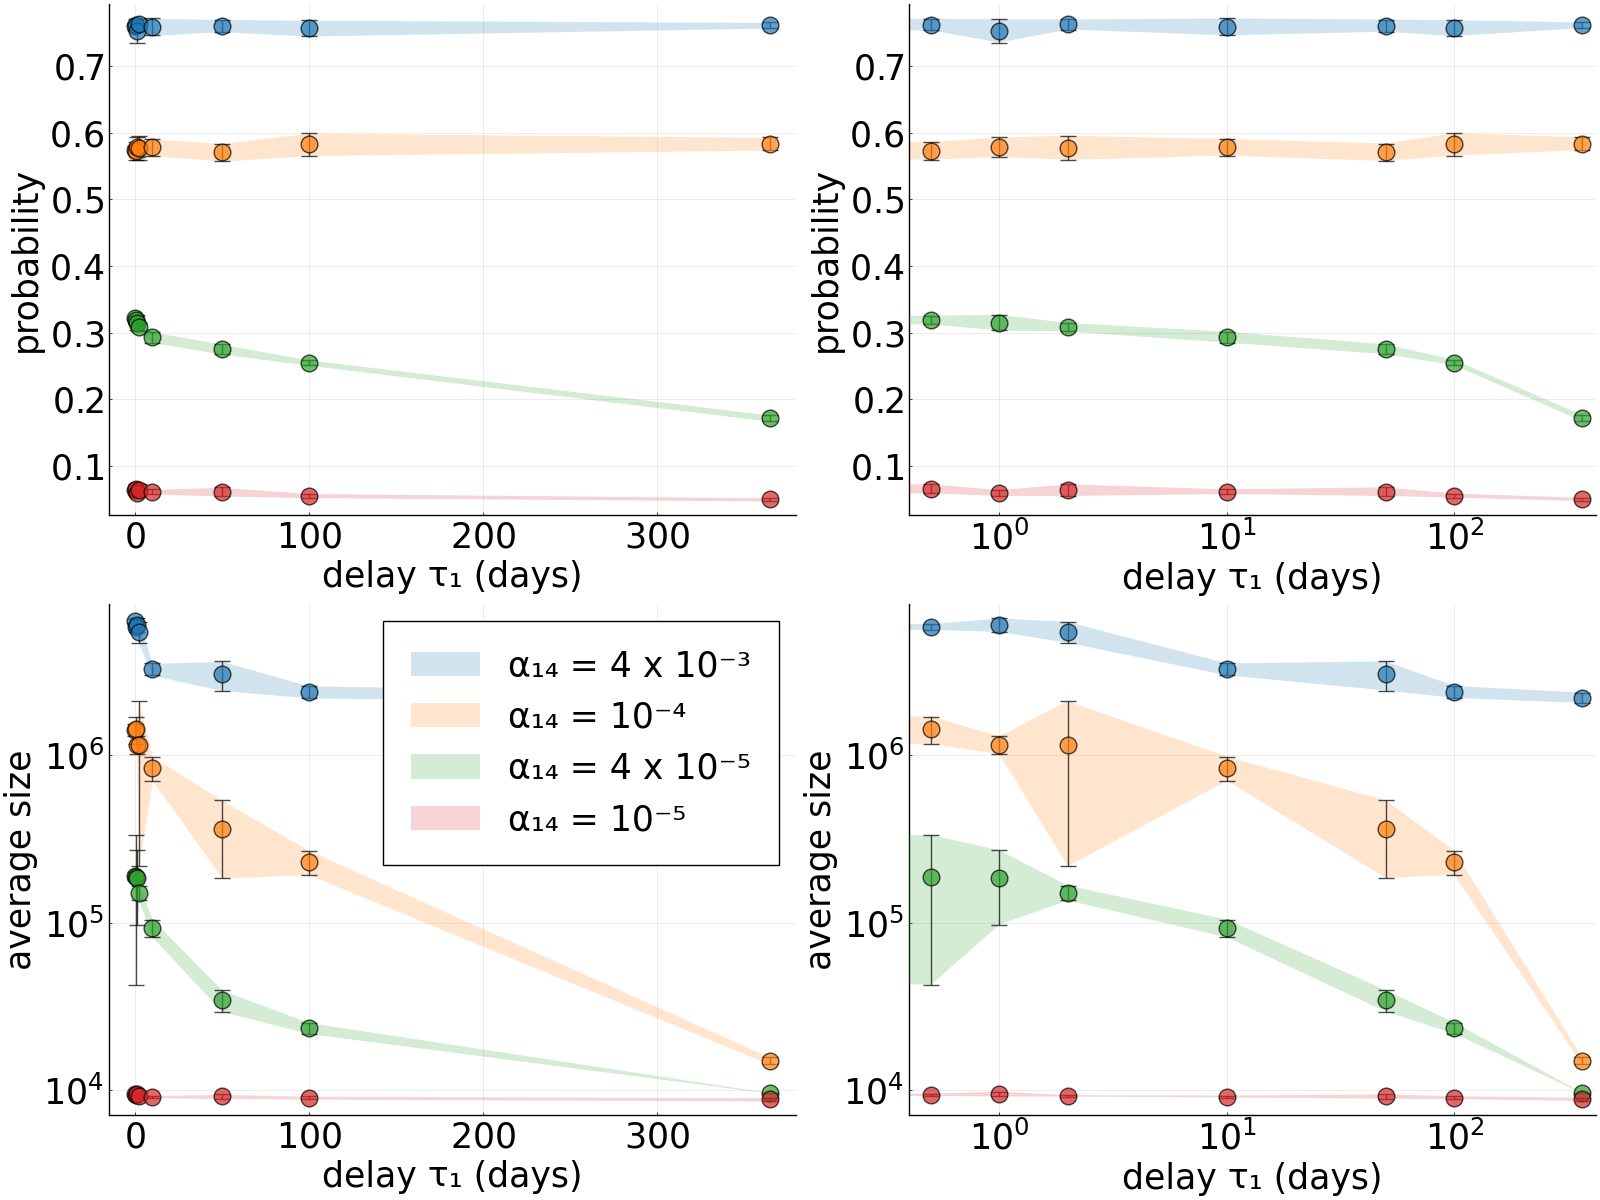

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

In [3]:
#plot for α₁₄
l = @layout [a b; c d]
delays = [0,0.5,1,2,10,50,100,365]


prob_success4n3 = [0.759553,0.762155,0.752634,0.762283,0.75871,0.76062,0.756838,0.761189]
prob_sigma4n3 = [0.00568293,0.00866865,0.0174283,0.00750729,0.0126971,0.00915389,0.0118609,0.00422383]
mean4n3 = [6.26142*10^6,5.7885*10^6,5.95688*10^6,5.4215*10^6,3.24397*10^6,3.01306*10^6,2.38067*10^6,2.19311*10^6]
mean_sigma4n3 = [172684.,227227.,549919.,772835.,264764.,595567.,195496.,155592.]
number_of_sims4n3 = [57418,14295,13761,13108,12715,14266,17001,113902]

prob_successn4 = [0.574812,0.572674,0.578308,0.577449,0.578106,0.570625,0.582441,0.583575]
prob_sigman4 = [0.00490157,0.0131076,0.0145891,0.0181315,0.0124555,0.0131415,0.016733,0.00957414]
meann4 = [1.40732*10^6,1.42801*10^6,1.15087*10^6,1.15213*10^6,837984.,359788.,230674.,14986.7]
mean_sigman4 = [114716.,264451.,140184.,935439.,136652.,175353.,37923.1,704.885]
number_of_simsn4 = [37156,6426,6417,6217,6440,7285,8315,17607]

prob_success4n5 = [0.322629,0.319044,0.31515,0.308323,0.293382,0.27524,0.255237,0.171995]
prob_sigma4n5 = [0.00215516,0.00654693,0.0116073,0.00639152,0.00815456,0.00739563,0.00401979,0.0047041]
mean4n5 = [190210.,187909.,183329.,150887.,92970.2,34504.4,23564.3,9644.07]
mean_sigma4n5 = [11358.9,145421.,86023.2,15361.2,11316.9,5051.03,1760.17,37.1716]
number_of_sims4n5 = [478526,50059,50925,50152,51387,54774,60242,120143]

prob_successn5 = [0.0647017,0.0659602,0.0597208,0.0639033,0.0616772,0.0617087,0.0558427,0.0501097]
prob_sigman5 = [0.00148987,0.00687419,0.00437965,0.00867741,0.00353767,0.00651826,0.00307879,0.00236783]
meann5 = [9525.35,9403.84,9505.02,9269.24,9180.97,9190.49,9041.87,8838.41]
mean_sigman5 = [83.7479,150.174,313.384,92.5832,122.965,266.012,172.063,198.523]
number_of_simsn5 = [293215,10946,10817,11001,11090,11927,12965,25983]

prob_success = [prob_success4n3 prob_successn4 prob_success4n5 prob_successn5]
prob_sigma = [prob_sigma4n3 prob_sigman4 prob_sigma4n5 prob_sigman5]

mean = [mean4n3 meann4 mean4n5 meann5]
mean_sigma = [mean_sigma4n3 mean_sigman4 mean_sigma4n5 mean_sigman5]

#p1 = plot(delays,prob_success100,yerror=prob_sigma100,ribbon=prob_sigma100,fillalpha= 0.2,grid=true,color="#0f87bf",align="center",alpha=0.7,label = "",xlabel = "delay τ₁ (days)",ylabel = "probability", seriestype =:scatter,xlims = (-15,380),markersize = 12)
p1 = plot(delays,prob_success,yerror=prob_sigma,ribbon=prob_sigma,fillalpha= 0.2,grid=true,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "delay τ₁ (days)",ylabel = "probability", seriestype =:scatter,xlims = (-15,380),markersize = 12)
p3 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,palette=:tab10,align="center",alpha=0.7,label = ["α₁₄ = 4 x 10⁻³" "α₁₄ = 10⁻⁴" "α₁₄ = 4 x 10⁻⁵" "α₁₄ = 10⁻⁵" "α₁ = 50" "α₁ = 0"],xlabel = "delay τ₁ (days)",ylabel = "average size", seriestype =:scatter,xlims = (-15,380),markersize = 12)
p2 = plot(delays,prob_success,yerror=prob_sigma,grid=true,ribbon=prob_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "delay τ₁ (days)",ylabel = "probability", seriestype =:scatter,xlims = (0.4,420),markersize = 12)
p4 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "delay τ₁ (days)",ylabel = "average size", seriestype =:scatter,xlims = (0.4,420),markersize = 12)
plot(p1, p2, p3, p4, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))
#savefig("/Users/jessekreger/Desktop/delay_figure2.png")

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30z

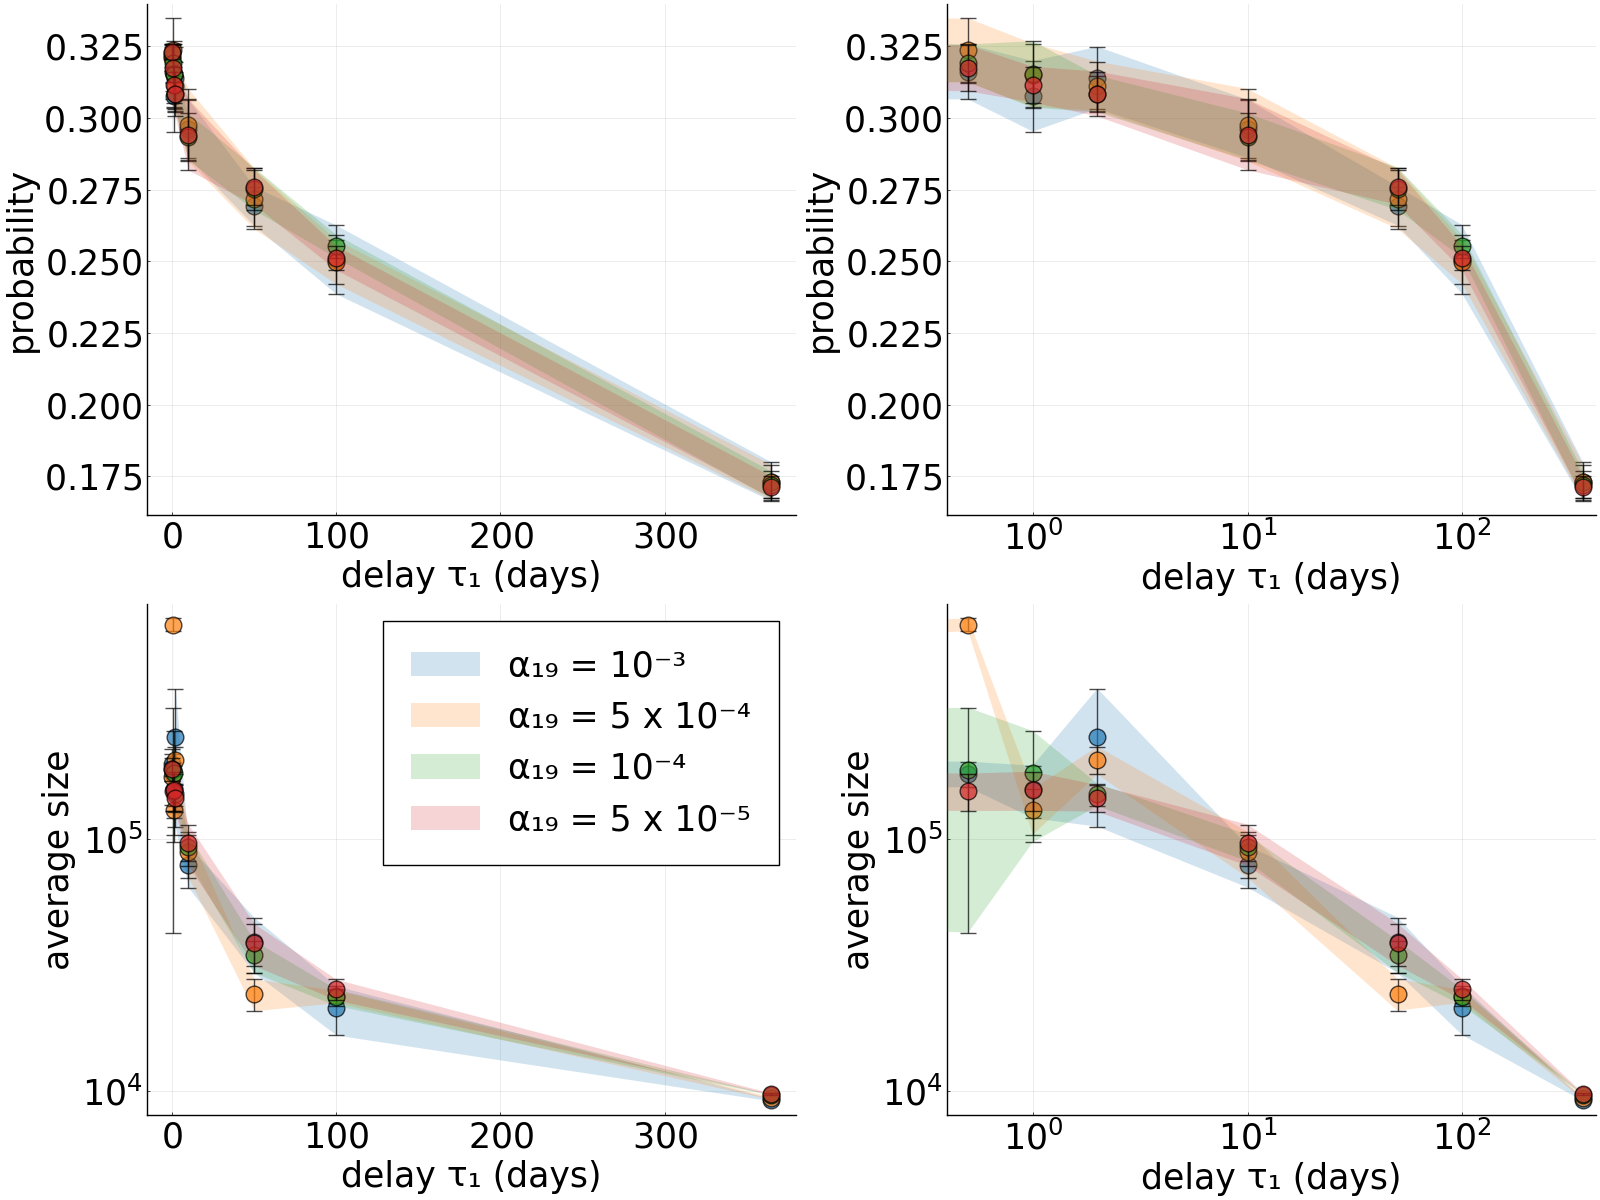

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

In [4]:
#plot for α₁₉
l = @layout [a b; c d]
delays = [0,0.5,1,2,10,50,100,365]

prob_successn3 = [0.321562,0.31599,0.30751,0.313964,0.296195,0.269238,0.250579,0.17317]
prob_sigman3 = [0.00387098,0.0095886,0.0123077,0.0108131,0.0101438,0.00681437,0.0119995,0.00678817]
meann3 = [199985.,182189.,158700.,254543.,79252.1,39125.2,21364.8,9201.41]
mean_sigman3 = [29505.1,21308.,37522.7,142374.,15002.3,9704.63,4720.38,98.6329]
number_of_simsn3 = [94750,9706,9694,9775,9882,10578,11653,22810]

prob_success5n4 = [0.320874,0.323489,0.314815,0.311085,0.297439,0.271857,0.249803,0.17297]
prob_sigma5n4 = [0.0047102,0.0111866,0.0110754,0.00853087,0.012638,0.0105693,0.0077245,0.00611186]
mean5n4 = [176847.,713660.,131188.,207342.,88689.9,24303.5,23754.5,9338.89]
mean_sigma5n4 = [40399.9,41599.,26946.1,26294.9,18361.5,3501.67,1367.71,109.165]
number_of_sims5n4 = [107628,10903,10908,10907,10661,11598,12706,25831]

prob_successn4 = [0.322629,0.319044,0.31515,0.308323,0.293382,0.27524,0.255237,0.171995]
prob_sigman4 = [0.00215516,0.00654693,0.0116073,0.00639152,0.00815456,0.00739563,0.00401979,0.0047041]
meann4 = [190210.,187909.,183329.,150887.,92970.2,34504.4,23564.3,9644.07]
mean_sigman4 = [11358.9,145421.,86023.2,15361.2,11316.9,5051.03,1760.17,37.1716]
number_of_simsn4 = [478526,50059,50925,50152,51387,54774,60242,120143]

prob_success5n5 = [0.32301,0.317309,0.31157,0.30832,0.294148,0.275806,0.251124,0.171309]
prob_sigma5n5 = [0.00265597,0.00803746,0.00623125,0.00782222,0.0123957,0.00609794,0.00415599,0.0037626]
mean5n5 = [190591.,155978.,157636.,146523.,96382.,38808.5,25333.6,9707.37]
mean_sigma5n5 = [19455.6,26470.6,27916.7,17797.2,17991.1,7357.33,2390.28,67.3391]
number_of_sims5n5 = [288731,30828,30311,30037,30658,32744,36476,70405]

prob_success = [prob_successn3 prob_success5n4 prob_successn4 prob_success5n5]
prob_sigma = [prob_sigman3 prob_sigma5n4 prob_sigman4 prob_sigma5n5]

mean = [meann3 mean5n4 meann4 mean5n5]
mean_sigma = [mean_sigman3 mean_sigma5n4 mean_sigman4 mean_sigma5n5]

#p1 = plot(delays,prob_success100,yerror=prob_sigma100,ribbon=prob_sigma100,fillalpha= 0.2,grid=true,color="#0f87bf",align="center",alpha=0.7,label = "",xlabel = "delay τ₁ (days)",ylabel = "probability", seriestype =:scatter,xlims = (-15,380),markersize = 12)
p1 = plot(delays,prob_success,yerror=prob_sigma,ribbon=prob_sigma,fillalpha= 0.2,grid=true,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "delay τ₁ (days)",ylabel = "probability", seriestype =:scatter,xlims = (-15,380),markersize = 12)
p3 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,palette=:tab10,align="center",alpha=0.7,label = ["α₁₉ = 10⁻³" "α₁₉ = 5 x 10⁻⁴" "α₁₉ = 10⁻⁴" "α₁₉ = 5 x 10⁻⁵" "α₁ = 50" "α₁ = 0"],xlabel = "delay τ₁ (days)",ylabel = "average size", seriestype =:scatter,xlims = (-15,380),markersize = 12)
p2 = plot(delays,prob_success,yerror=prob_sigma,grid=true,ribbon=prob_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "delay τ₁ (days)",ylabel = "probability", seriestype =:scatter,xlims = (0.4,420),markersize = 12)
p4 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "delay τ₁ (days)",ylabel = "average size", seriestype =:scatter,xlims = (0.4,420),markersize = 12)
plot(p1, p2, p3, p4, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))
#savefig("/Users/jessekreger/Desktop/delay_figure3.png")

# Time plot

In [1]:
using Plots; pyplot()

Plots.PyPlotBackend()

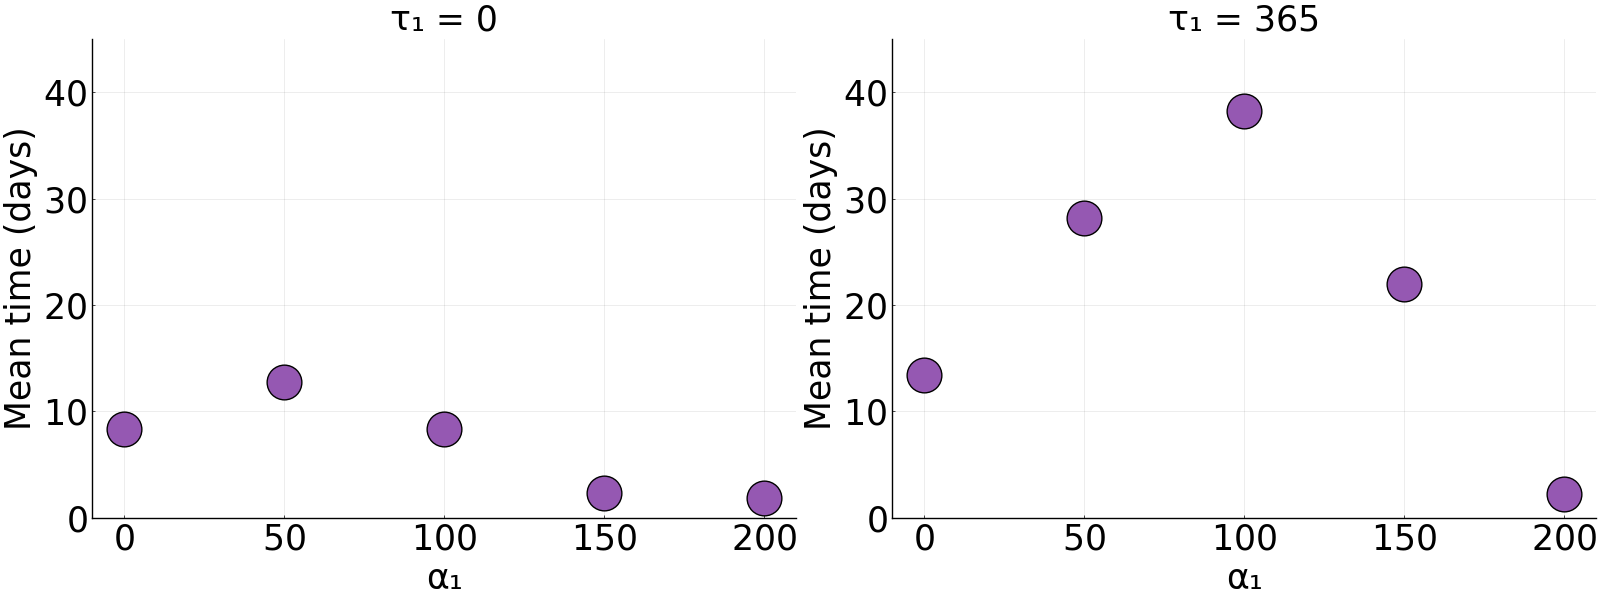

In [5]:
#time to extinction plot
l = @layout [a b]
delays = [0,0.5,1,2,10,50,100,365]
alpha1 = [0,50,100,150,200]
times0 = [8.31242,12.7295,8.32364,2.35016,1.85276]
times365 = [13.4649,28.1505,38.2654,21.9719,2.26509]

logocolors = Colors.JULIA_LOGO_COLORS

p1 = plot(alpha1,times0,grid=true,color=logocolors.purple,align="center",title = "τ₁ = 0",xlabel = "α₁",ylabel = "Mean time (days)",legend = false,seriestype =:scatter,markersize = 25,font = "Ariel",xlims = (-10,210),ylims = (0,45))
p2 = plot(alpha1,times365,grid=true,color=logocolors.purple,align="center",title = "τ₁ = 365",xlabel = "α₁",ylabel = "Mean time (days)",legend = false,seriestype =:scatter,markersize = 25,font = "Ariel",xlims = (-10,210),ylims = (0,45))
plot(p1,p2,layout = l,size =(1600,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),titlefont=font(25))